In [1]:
#001 フォルダー作成
import os
import pandas as pd

data_dir="Num_3_predict"

input_dir=os.path.join(data_dir,"00_input")
output_dir=os.path.join(data_dir,"01_output")
output_results_dir=os.path.join(data_dir,"02_output_results")
master_dir=os.path.join(data_dir,"03_master")

data_dir_2="Num_3_predict//00_input"
all_data_dir=os.path.join(data_dir_2,"001_all_data")
all_data_inital_dir=os.path.join(data_dir_2,"001_all_data_inital")
display(input_dir)


'Num_3_predict/00_input'

In [2]:
#002　フォルダー出力
os.makedirs(input_dir,exist_ok=True)
os.makedirs(output_dir,exist_ok=True)
os.makedirs(output_results_dir,exist_ok=True)
os.makedirs(master_dir,exist_ok=True)

os.makedirs(all_data_dir,exist_ok=True)
os.makedirs(all_data_inital_dir,exist_ok=True)

In [3]:
#003　csv_取得
import glob
Num_3_file=os.path.join(input_dir,'Num_3_*.csv')
Num_3_paths=glob.glob(Num_3_file)
display(Num_3_paths)

['Num_3_predict\\00_input\\Num_3_2018.csv',
 'Num_3_predict\\00_input\\Num_3_2019.csv',
 'Num_3_predict\\00_input\\Num_3_2020.csv',
 'Num_3_predict\\00_input\\Num_3_2021.csv',
 'Num_3_predict\\00_input\\Num_3_2022.csv']

In [4]:
#004 csv_data 呼び出して内容を確認
Num_3_predict_dir=os.path.join(data_dir,'00_input')
Num_3_file='Num_3_2022.csv' #西暦ごとに出力 + #005欠損値も確認
Num_3=pd.read_csv(os.path.join(Num_3_predict_dir,Num_3_file))
display(Num_3.head())


,No,date,Lottery_result,hundreds_place,tens_place,ones_place
0,1,2022/1/4,394,3,9,4
1,2,2022/1/5,917,9,1,7
2,3,2022/1/6,201,2,0,1
3,4,2022/1/7,698,6,9,8
4,5,2022/1/10,758,7,5,8


In [5]:
#005 欠損値の確認---どちらでもOK---
#Num_3.isna().sum 
Num_3.isnull().sum #Falseは欠損なし

<bound method NDFrame._add_numeric_operations.<locals>.sum of         No   date  Lottery_result  hundreds_place  tens_place  ones_place
0    False  False           False           False       False       False
1    False  False           False           False       False       False
2    False  False           False           False       False       False
3    False  False           False           False       False       False
4    False  False           False           False       False       False
..     ...    ...             ...             ...         ...         ...
254  False  False           False           False       False       False
255  False  False           False           False       False       False
256  False  False           False           False       False       False
257  False  False           False           False       False       False
258  False  False           False           False       False       False

[259 rows x 6 columns]>

In [6]:
#006 2018_2022 csvの結合 5年分
import pandas as pd
Num_3_2018_2022=pd.DataFrame()
for file in Num_3_paths:
    Num_3_data=pd.read_csv(file)
    display(f'{file}:{len(Num_3_data)}')
    Num_3_2018_2022=pd.concat([Num_3_2018_2022,Num_3_data],ignore_index=True)

'Num_3_predict\\00_input\\Num_3_2018.csv:257'

'Num_3_predict\\00_input\\Num_3_2019.csv:257'

'Num_3_predict\\00_input\\Num_3_2020.csv:258'

'Num_3_predict\\00_input\\Num_3_2021.csv:259'

'Num_3_predict\\00_input\\Num_3_2022.csv:259'

In [7]:
#007 csvファイル確認
Num_3_2018_2022

,No,date,Lottery_result,hundreds_place,tens_place,ones_place
0,1,2018/1/4,858,8,5,8
1,2,2018/1/5,384,3,8,4
2,3,2018/1/8,976,9,7,6
3,4,2018/1/9,930,9,3,0
4,5,2018/1/10,634,6,3,4
...,...,...,...,...,...,...
1285,255,2022/12/26,857,8,5,7
1286,256,2022/12/27,929,9,2,9
1287,257,2022/12/28,958,9,5,8
1288,258,2022/12/29,194,1,9,4


In [8]:
#008 ファイルの欠損値確認
Num_3_2018_2022.isnull().sum() #0はなし

No                0
date              0
Lottery_result    0
hundreds_place    0
tens_place        0
ones_place        0
dtype: int64

In [9]:
#009 結合で作成したNum_3_2018_2022でcsvファイルで出力
data_file='Num_3_2018_2022.csv'
Num_3_2018_2022.to_csv(os.path.join(output_dir,data_file),index=False)


In [10]:
#010  csvデータを確認
Num_3_2018_2022

,No,date,Lottery_result,hundreds_place,tens_place,ones_place
0,1,2018/1/4,858,8,5,8
1,2,2018/1/5,384,3,8,4
2,3,2018/1/8,976,9,7,6
3,4,2018/1/9,930,9,3,0
4,5,2018/1/10,634,6,3,4
...,...,...,...,...,...,...
1285,255,2022/12/26,857,8,5,7
1286,256,2022/12/27,929,9,2,9
1287,257,2022/12/28,958,9,5,8
1288,258,2022/12/29,194,1,9,4


In [11]:
#011 indexを回別で振り直し webで2018年の第4827回から
Num_3_2018_2022['kaibetu']=range(4827,len(Num_3_2018_2022.index)+4827)

In [12]:
#012 csvデータを確認
Num_3_2018_2022

,No,date,Lottery_result,hundreds_place,tens_place,ones_place,kaibetu
0,1,2018/1/4,858,8,5,8,4827
1,2,2018/1/5,384,3,8,4,4828
2,3,2018/1/8,976,9,7,6,4829
3,4,2018/1/9,930,9,3,0,4830
4,5,2018/1/10,634,6,3,4,4831
...,...,...,...,...,...,...,...
1285,255,2022/12/26,857,8,5,7,6112
1286,256,2022/12/27,929,9,2,9,6113
1287,257,2022/12/28,958,9,5,8,6114
1288,258,2022/12/29,194,1,9,4,6115


In [13]:
#013 data type 確認
Num_3_2018_2022.dtypes

No                 int64
date              object
Lottery_result     int64
hundreds_place     int64
tens_place         int64
ones_place         int64
kaibetu            int64
dtype: object

In [14]:
#014 dateのobject を datetime に変換
Num_3_2018_2022['date']=pd.to_datetime(Num_3_2018_2022['date'])

In [15]:
#015 data type 確認
Num_3_2018_2022.dtypes

No                         int64
date              datetime64[ns]
Lottery_result             int64
hundreds_place             int64
tens_place                 int64
ones_place                 int64
kaibetu                    int64
dtype: object

In [16]:
#016 曜日と曜日の変数を取得
Num_3_2018_2022['day_of_week']=Num_3_2018_2022['date'].dt.day_of_week
Num_3_2018_2022['day_name']=Num_3_2018_2022['date'].dt.day_name()

In [17]:
#017 データ確認
Num_3_2018_2022

,No,date,Lottery_result,hundreds_place,tens_place,ones_place,kaibetu,day_of_week,day_name
0,1,2018-01-04,858,8,5,8,4827,3,Thursday
1,2,2018-01-05,384,3,8,4,4828,4,Friday
2,3,2018-01-08,976,9,7,6,4829,0,Monday
3,4,2018-01-09,930,9,3,0,4830,1,Tuesday
4,5,2018-01-10,634,6,3,4,4831,2,Wednesday
...,...,...,...,...,...,...,...,...,...
1285,255,2022-12-26,857,8,5,7,6112,0,Monday
1286,256,2022-12-27,929,9,2,9,6113,1,Tuesday
1287,257,2022-12-28,958,9,5,8,6114,2,Wednesday
1288,258,2022-12-29,194,1,9,4,6115,3,Thursday


In [18]:
#018 ファイルの欠損値確認
Num_3_2018_2022.isnull().sum()

No                0
date              0
Lottery_result    0
hundreds_place    0
tens_place        0
ones_place        0
kaibetu           0
day_of_week       0
day_name          0
dtype: int64

In [19]:
#019 data type 確認
Num_3_2018_2022.dtypes

No                         int64
date              datetime64[ns]
Lottery_result             int64
hundreds_place             int64
tens_place                 int64
ones_place                 int64
kaibetu                    int64
day_of_week                int64
day_name                  object
dtype: object

In [20]:
#020 csv　書き込み
data_file='Num_3_2018_2022.csv'
Num_3_2018_2022.to_csv(os.path.join(output_dir,data_file),index=False)

In [21]:
#conda install -c saravji pmdarima #021　エラー対策

In [22]:
#021 day_of_week を変数化
import numpy as np
import pandas as pd

from pmdarima.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

import optuna
from optuna.integration import OptunaSearchCV
from optuna.distributions import FloatDistribution
from optuna.distributions import IntDistribution



In [23]:
#022 変数に変換したいcsv呼び出し
dataset='Num_3_predict/01_output/Num_3_2018_2022.csv'
Num_3_2018_2022=pd.read_csv(dataset)
Num_3_2018_2022

,No,date,Lottery_result,hundreds_place,tens_place,ones_place,kaibetu,day_of_week,day_name
0,1,2018-01-04,858,8,5,8,4827,3,Thursday
1,2,2018-01-05,384,3,8,4,4828,4,Friday
2,3,2018-01-08,976,9,7,6,4829,0,Monday
3,4,2018-01-09,930,9,3,0,4830,1,Tuesday
4,5,2018-01-10,634,6,3,4,4831,2,Wednesday
...,...,...,...,...,...,...,...,...,...
1285,255,2022-12-26,857,8,5,7,6112,0,Monday
1286,256,2022-12-27,929,9,2,9,6113,1,Tuesday
1287,257,2022-12-28,958,9,5,8,6114,2,Wednesday
1288,258,2022-12-29,194,1,9,4,6115,3,Thursday


In [24]:
#023 曜日のダミー変数を生成
week_list=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

enc=OneHotEncoder(categories=[week_list],sparse=False)
week_d=enc.fit_transform(Num_3_2018_2022[['day_name']])
df_week_d=pd.DataFrame(week_d,index=Num_3_2018_2022.index,columns=week_list,dtype='int')
print(df_week_d)

      Sunday  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday
0          0       0        0          0         1       0         0
1          0       0        0          0         0       1         0
2          0       1        0          0         0       0         0
3          0       0        1          0         0       0         0
4          0       0        0          1         0       0         0
...      ...     ...      ...        ...       ...     ...       ...
1285       0       1        0          0         0       0         0
1286       0       0        1          0         0       0         0
1287       0       0        0          1         0       0         0
1288       0       0        0          0         1       0         0
1289       0       0        0          0         0       1         0

[1290 rows x 7 columns]


c:\Users\yoshikoshi\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [25]:
#分析で遠し番号を作成
Num_3_2018_2022['trend']=range(1,len(Num_3_2018_2022.index)+1)
Num_3_2018_2022

,No,date,Lottery_result,hundreds_place,tens_place,ones_place,kaibetu,day_of_week,day_name,trend
0,1,2018-01-04,858,8,5,8,4827,3,Thursday,1
1,2,2018-01-05,384,3,8,4,4828,4,Friday,2
2,3,2018-01-08,976,9,7,6,4829,0,Monday,3
3,4,2018-01-09,930,9,3,0,4830,1,Tuesday,4
4,5,2018-01-10,634,6,3,4,4831,2,Wednesday,5
...,...,...,...,...,...,...,...,...,...,...
1285,255,2022-12-26,857,8,5,7,6112,0,Monday,1286
1286,256,2022-12-27,929,9,2,9,6113,1,Tuesday,1287
1287,257,2022-12-28,958,9,5,8,6114,2,Wednesday,1288
1288,258,2022-12-29,194,1,9,4,6115,3,Thursday,1289


In [26]:
#024 変換したデータの結合
Num_3_2018_2022 = pd.concat([Num_3_2018_2022, df_week_d], axis=1)
Num_3_2018_2022

,No,date,Lottery_result,hundreds_place,tens_place,ones_place,kaibetu,day_of_week,day_name,trend,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,1,2018-01-04,858,8,5,8,4827,3,Thursday,1,0,0,0,0,1,0,0
1,2,2018-01-05,384,3,8,4,4828,4,Friday,2,0,0,0,0,0,1,0
2,3,2018-01-08,976,9,7,6,4829,0,Monday,3,0,1,0,0,0,0,0
3,4,2018-01-09,930,9,3,0,4830,1,Tuesday,4,0,0,1,0,0,0,0
4,5,2018-01-10,634,6,3,4,4831,2,Wednesday,5,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,255,2022-12-26,857,8,5,7,6112,0,Monday,1286,0,1,0,0,0,0,0
1286,256,2022-12-27,929,9,2,9,6113,1,Tuesday,1287,0,0,1,0,0,0,0
1287,257,2022-12-28,958,9,5,8,6114,2,Wednesday,1288,0,0,0,1,0,0,0
1288,258,2022-12-29,194,1,9,4,6115,3,Thursday,1289,0,0,0,0,1,0,0


In [27]:
#025 変換したデータをcsvに書き込み
Num_3_2018_2022.to_csv('Num_3_predict/01_output/Num_3_2018_2022.csv')

In [28]:
#データ確認
Num_3_2018_2022

,No,date,Lottery_result,hundreds_place,tens_place,ones_place,kaibetu,day_of_week,day_name,trend,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,1,2018-01-04,858,8,5,8,4827,3,Thursday,1,0,0,0,0,1,0,0
1,2,2018-01-05,384,3,8,4,4828,4,Friday,2,0,0,0,0,0,1,0
2,3,2018-01-08,976,9,7,6,4829,0,Monday,3,0,1,0,0,0,0,0
3,4,2018-01-09,930,9,3,0,4830,1,Tuesday,4,0,0,1,0,0,0,0
4,5,2018-01-10,634,6,3,4,4831,2,Wednesday,5,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,255,2022-12-26,857,8,5,7,6112,0,Monday,1286,0,1,0,0,0,0,0
1286,256,2022-12-27,929,9,2,9,6113,1,Tuesday,1287,0,0,1,0,0,0,0
1287,257,2022-12-28,958,9,5,8,6114,2,Wednesday,1288,0,0,0,1,0,0,0
1288,258,2022-12-29,194,1,9,4,6115,3,Thursday,1289,0,0,0,0,1,0,0


In [29]:
#022 data type 確認
Num_3_2018_2022.dtypes

No                 int64
date              object
Lottery_result     int64
hundreds_place     int64
tens_place         int64
ones_place         int64
kaibetu            int64
day_of_week        int64
day_name          object
trend              int64
Sunday             int32
Monday             int32
Tuesday            int32
Wednesday          int32
Thursday           int32
Friday             int32
Saturday           int32
dtype: object

In [30]:
#023 もう一度　dateのobject を datetime に変換
Num_3_2018_2022['date']=pd.to_datetime(Num_3_2018_2022['date'])

In [31]:
#025 Type 変換確認
Num_3_2018_2022.dtypes

No                         int64
date              datetime64[ns]
Lottery_result             int64
hundreds_place             int64
tens_place                 int64
ones_place                 int64
kaibetu                    int64
day_of_week                int64
day_name                  object
trend                      int64
Sunday                     int32
Monday                     int32
Tuesday                    int32
Wednesday                  int32
Thursday                   int32
Friday                     int32
Saturday                   int32
dtype: object

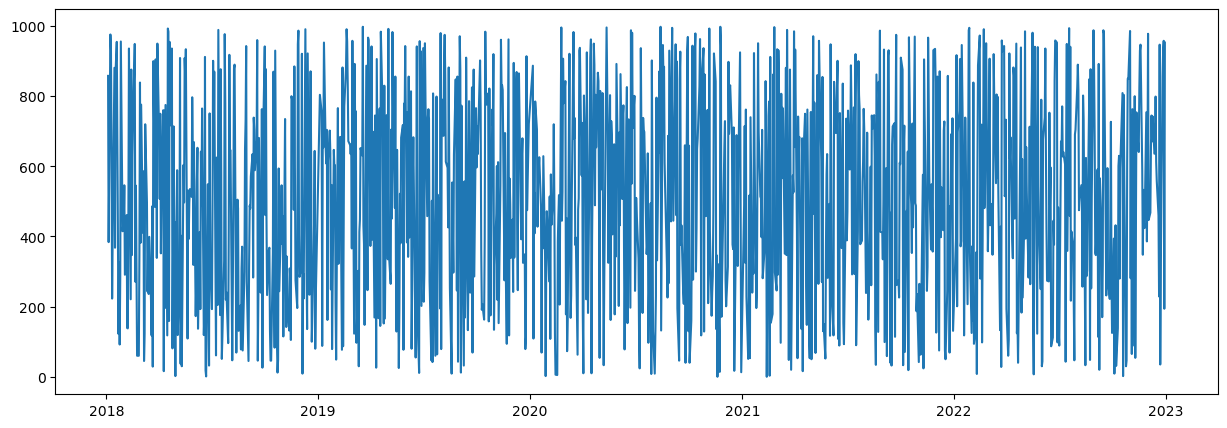

In [32]:
#023 折れ線グラフ
import pandas as pd
import matplotlib.pyplot as plt
x=Num_3_2018_2022['date']
y=Num_3_2018_2022['Lottery_result']
plt.figure(figsize=(15,5))
plt.plot(x,y)


In [33]:
#026 Lottery_resultのhundreds_place数値を変数化
num_list=['0','1','2','3','4','5','6','7','8','9']

enc=OneHotEncoder(categories=[num_list],sparse=False)
num_d=enc.fit_transform(Num_3_2018_2022[['hundreds_place']])
df_num_d_h=pd.DataFrame(num_d,index=Num_3_2018_2022.index,columns=num_list,dtype='int')
df_num_d_h

c:\Users\yoshikoshi\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1285,0,0,0,0,0,0,0,0,1,0
1286,0,0,0,0,0,0,0,0,0,1
1287,0,0,0,0,0,0,0,0,0,1
1288,0,1,0,0,0,0,0,0,0,0


In [34]:
#027 列名の変更
df_num_d_h_new=df_num_d_h.rename(columns={'0':'h_0','1':'h_1','2':'h_2','3':'h_3','4':'h_4','5':'h_5','6':'h_6','7':'h_7','8':'h_8','9':'h_9'})
df_num_d_h_new

,h_0,h_1,h_2,h_3,h_4,h_5,h_6,h_7,h_8,h_9
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1285,0,0,0,0,0,0,0,0,1,0
1286,0,0,0,0,0,0,0,0,0,1
1287,0,0,0,0,0,0,0,0,0,1
1288,0,1,0,0,0,0,0,0,0,0


In [35]:
#028 Lottery_resultのtens_place数値を変数化
num_list=['0','1','2','3','4','5','6','7','8','9']

enc=OneHotEncoder(categories=[num_list],sparse=False)
num_d=enc.fit_transform(Num_3_2018_2022[['tens_place']])
df_num_d_t=pd.DataFrame(num_d,index=Num_3_2018_2022.index,columns=num_list,dtype='int')
df_num_d_t

c:\Users\yoshikoshi\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1285,0,0,0,0,0,1,0,0,0,0
1286,0,0,1,0,0,0,0,0,0,0
1287,0,0,0,0,0,1,0,0,0,0
1288,0,0,0,0,0,0,0,0,0,1


In [36]:
#029 列名の変更
df_num_d_t_new=df_num_d_t.rename(columns={'0':'t_0','1':'t_1','2':'t_2','3':'t_3','4':'t_4','5':'t_5','6':'t_6','7':'t_7','8':'t_8','9':'t_9'})
df_num_d_t_new

,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9
0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1285,0,0,0,0,0,1,0,0,0,0
1286,0,0,1,0,0,0,0,0,0,0
1287,0,0,0,0,0,1,0,0,0,0
1288,0,0,0,0,0,0,0,0,0,1


In [37]:
#030 Lottery_resultのones_place数値を変数化
num_list=['0','1','2','3','4','5','6','7','8','9']

enc=OneHotEncoder(categories=[num_list],sparse=False)
num_d=enc.fit_transform(Num_3_2018_2022[['ones_place']])
df_num_d_o=pd.DataFrame(num_d,index=Num_3_2018_2022.index,columns=num_list,dtype='int')
df_num_d_o

c:\Users\yoshikoshi\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1285,0,0,0,0,0,0,0,1,0,0
1286,0,0,0,0,0,0,0,0,0,1
1287,0,0,0,0,0,0,0,0,1,0
1288,0,0,0,0,1,0,0,0,0,0


In [38]:
#031 列名の変更
df_num_d_o_new=df_num_d_o.rename(columns={'0':'o_0','1':'o_1','2':'o_2','3':'o_3','4':'o_4','5':'o_5','6':'o_6','7':'o_7','8':'o_8','9':'o_9'})
df_num_d_o_new

,o_0,o_1,o_2,o_3,o_4,o_5,o_6,o_7,o_8,o_9
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1285,0,0,0,0,0,0,0,1,0,0
1286,0,0,0,0,0,0,0,0,0,1
1287,0,0,0,0,0,0,0,0,1,0
1288,0,0,0,0,1,0,0,0,0,0


In [39]:
#032 変換したデータの結合
#Num_3_2018_2022 = pd.concat([Num_3_2018_2022, df_num_d_h,df_num_d_t,df_num_d_o], axis=1)
df_num_hto = pd.concat([df_num_d_h_new,df_num_d_t_new,df_num_d_o_new], axis=1)
df_num_hto

,h_0,h_1,h_2,h_3,h_4,h_5,h_6,h_7,h_8,h_9,...,o_0,o_1,o_2,o_3,o_4,o_5,o_6,o_7,o_8,o_9
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1286,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1287,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1288,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [40]:
#033 3つの数値変換した結合データから頻度を集計
#num_list=['0','1','2','3','4','5','6','7','8','9']

#df=df_num_hto['0'].sum(axis=1)
          
df_num_3=pd.DataFrame({'num_0':df_num_hto[['h_0','t_0','o_0']].sum(axis=1),
                       'num_1':df_num_hto[['h_1','t_1','o_1']].sum(axis=1),
                       'num_2':df_num_hto[['h_2','t_2','o_2']].sum(axis=1),
                       'num_3':df_num_hto[['h_3','t_3','o_3']].sum(axis=1),
                       'num_4':df_num_hto[['h_4','t_4','o_4']].sum(axis=1),
                       'num_5':df_num_hto[['h_5','t_5','o_5']].sum(axis=1),
                       'num_6':df_num_hto[['h_6','t_6','o_6']].sum(axis=1),
                       'num_7':df_num_hto[['h_7','t_7','o_7']].sum(axis=1),
                       'num_8':df_num_hto[['h_8','t_8','o_8']].sum(axis=1),
                       'num_9':df_num_hto[['h_9','t_9','o_9']].sum(axis=1)})
                    
df_num_3

,num_0,num_1,num_2,num_3,num_4,num_5,num_6,num_7,num_8,num_9
0,0,0,0,0,0,1,0,0,2,0
1,0,0,0,1,1,0,0,0,1,0
2,0,0,0,0,0,0,1,1,0,1
3,1,0,0,1,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1285,0,0,0,0,0,1,0,1,1,0
1286,0,0,1,0,0,0,0,0,0,2
1287,0,0,0,0,0,1,0,0,1,1
1288,0,1,0,0,1,0,0,0,0,1


In [41]:
#034 変換したデータの結合
#Num_3_2018_2022 = pd.concat([Num_3_2018_2022, df_num_d_h,df_num_d_t,df_num_d_o], axis=1)
Num_3_2018_2022 = pd.concat([Num_3_2018_2022,df_num_d_h_new,df_num_d_t_new,df_num_d_o_new,df_num_3], axis=1)
Num_3_2018_2022

,No,date,Lottery_result,hundreds_place,tens_place,ones_place,kaibetu,day_of_week,day_name,trend,...,num_0,num_1,num_2,num_3,num_4,num_5,num_6,num_7,num_8,num_9
0,1,2018-01-04,858,8,5,8,4827,3,Thursday,1,...,0,0,0,0,0,1,0,0,2,0
1,2,2018-01-05,384,3,8,4,4828,4,Friday,2,...,0,0,0,1,1,0,0,0,1,0
2,3,2018-01-08,976,9,7,6,4829,0,Monday,3,...,0,0,0,0,0,0,1,1,0,1
3,4,2018-01-09,930,9,3,0,4830,1,Tuesday,4,...,1,0,0,1,0,0,0,0,0,1
4,5,2018-01-10,634,6,3,4,4831,2,Wednesday,5,...,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,255,2022-12-26,857,8,5,7,6112,0,Monday,1286,...,0,0,0,0,0,1,0,1,1,0
1286,256,2022-12-27,929,9,2,9,6113,1,Tuesday,1287,...,0,0,1,0,0,0,0,0,0,2
1287,257,2022-12-28,958,9,5,8,6114,2,Wednesday,1288,...,0,0,0,0,0,1,0,0,1,1
1288,258,2022-12-29,194,1,9,4,6115,3,Thursday,1289,...,0,1,0,0,1,0,0,0,0,1


In [42]:
#035 変換したデータをcsvに書き込み
#Num_3_2018_2022.to_csv('Num_3_predict/01_output/Num_3_2018_2022.csv')
Num_3_2018_2022.to_csv('Num_3_predict/01_output/Num_3_2018_2022.csv')

In [43]:
#036 csvデータ確認
Num_3_2018_2022

,No,date,Lottery_result,hundreds_place,tens_place,ones_place,kaibetu,day_of_week,day_name,trend,...,num_0,num_1,num_2,num_3,num_4,num_5,num_6,num_7,num_8,num_9
0,1,2018-01-04,858,8,5,8,4827,3,Thursday,1,...,0,0,0,0,0,1,0,0,2,0
1,2,2018-01-05,384,3,8,4,4828,4,Friday,2,...,0,0,0,1,1,0,0,0,1,0
2,3,2018-01-08,976,9,7,6,4829,0,Monday,3,...,0,0,0,0,0,0,1,1,0,1
3,4,2018-01-09,930,9,3,0,4830,1,Tuesday,4,...,1,0,0,1,0,0,0,0,0,1
4,5,2018-01-10,634,6,3,4,4831,2,Wednesday,5,...,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,255,2022-12-26,857,8,5,7,6112,0,Monday,1286,...,0,0,0,0,0,1,0,1,1,0
1286,256,2022-12-27,929,9,2,9,6113,1,Tuesday,1287,...,0,0,1,0,0,0,0,0,0,2
1287,257,2022-12-28,958,9,5,8,6114,2,Wednesday,1288,...,0,0,0,0,0,1,0,0,1,1
1288,258,2022-12-29,194,1,9,4,6115,3,Thursday,1289,...,0,1,0,0,1,0,0,0,0,1


In [44]:
#037 不要な列を削除
df_1=Num_3_2018_2022.drop('No',axis=1)
df_1


,date,Lottery_result,hundreds_place,tens_place,ones_place,kaibetu,day_of_week,day_name,trend,Sunday,...,num_0,num_1,num_2,num_3,num_4,num_5,num_6,num_7,num_8,num_9
0,2018-01-04,858,8,5,8,4827,3,Thursday,1,0,...,0,0,0,0,0,1,0,0,2,0
1,2018-01-05,384,3,8,4,4828,4,Friday,2,0,...,0,0,0,1,1,0,0,0,1,0
2,2018-01-08,976,9,7,6,4829,0,Monday,3,0,...,0,0,0,0,0,0,1,1,0,1
3,2018-01-09,930,9,3,0,4830,1,Tuesday,4,0,...,1,0,0,1,0,0,0,0,0,1
4,2018-01-10,634,6,3,4,4831,2,Wednesday,5,0,...,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,2022-12-26,857,8,5,7,6112,0,Monday,1286,0,...,0,0,0,0,0,1,0,1,1,0
1286,2022-12-27,929,9,2,9,6113,1,Tuesday,1287,0,...,0,0,1,0,0,0,0,0,0,2
1287,2022-12-28,958,9,5,8,6114,2,Wednesday,1288,0,...,0,0,0,0,0,1,0,0,1,1
1288,2022-12-29,194,1,9,4,6115,3,Thursday,1289,0,...,0,1,0,0,1,0,0,0,0,1


In [45]:
#038 dateをインデックス
Num_3_2018_2022=df_1.set_index('date')
Num_3_2018_2022

,Lottery_result,hundreds_place,tens_place,ones_place,kaibetu,day_of_week,day_name,trend,Sunday,Monday,...,num_0,num_1,num_2,num_3,num_4,num_5,num_6,num_7,num_8,num_9
date,,,,,,,,,,,,,,,,,,,,,
2018-01-04,858,8,5,8,4827,3,Thursday,1,0,0,...,0,0,0,0,0,1,0,0,2,0
2018-01-05,384,3,8,4,4828,4,Friday,2,0,0,...,0,0,0,1,1,0,0,0,1,0
2018-01-08,976,9,7,6,4829,0,Monday,3,0,1,...,0,0,0,0,0,0,1,1,0,1
2018-01-09,930,9,3,0,4830,1,Tuesday,4,0,0,...,1,0,0,1,0,0,0,0,0,1
2018-01-10,634,6,3,4,4831,2,Wednesday,5,0,0,...,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,857,8,5,7,6112,0,Monday,1286,0,1,...,0,0,0,0,0,1,0,1,1,0
2022-12-27,929,9,2,9,6113,1,Tuesday,1287,0,0,...,0,0,1,0,0,0,0,0,0,2
2022-12-28,958,9,5,8,6114,2,Wednesday,1288,0,0,...,0,0,0,0,0,1,0,0,1,1


In [46]:
#039 csvに書き込み
Num_3_2018_2022.to_csv('Num_3_predict/01_output/Num_3_2018_2022.csv')
Num_3_2018_2022

,Lottery_result,hundreds_place,tens_place,ones_place,kaibetu,day_of_week,day_name,trend,Sunday,Monday,...,num_0,num_1,num_2,num_3,num_4,num_5,num_6,num_7,num_8,num_9
date,,,,,,,,,,,,,,,,,,,,,
2018-01-04,858,8,5,8,4827,3,Thursday,1,0,0,...,0,0,0,0,0,1,0,0,2,0
2018-01-05,384,3,8,4,4828,4,Friday,2,0,0,...,0,0,0,1,1,0,0,0,1,0
2018-01-08,976,9,7,6,4829,0,Monday,3,0,1,...,0,0,0,0,0,0,1,1,0,1
2018-01-09,930,9,3,0,4830,1,Tuesday,4,0,0,...,1,0,0,1,0,0,0,0,0,1
2018-01-10,634,6,3,4,4831,2,Wednesday,5,0,0,...,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,857,8,5,7,6112,0,Monday,1286,0,1,...,0,0,0,0,0,1,0,1,1,0
2022-12-27,929,9,2,9,6113,1,Tuesday,1287,0,0,...,0,0,1,0,0,0,0,0,0,2
2022-12-28,958,9,5,8,6114,2,Wednesday,1288,0,0,...,0,0,0,0,0,1,0,0,1,1


In [47]:
#-----分析開始できるけど本を読んでから-----
#データをしっかり把握


In [48]:
import pandas as pd
import numpy as np
from scipy import signal
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [49]:
#040 code3-2 さあ、教科書通りにはじめるよ 
dataset='Num_3_predict/01_output/Num_3_2018_2022.csv'
df=pd.read_csv(dataset,index_col='date',parse_dates=True)
df

,Lottery_result,hundreds_place,tens_place,ones_place,kaibetu,day_of_week,day_name,trend,Sunday,Monday,...,num_0,num_1,num_2,num_3,num_4,num_5,num_6,num_7,num_8,num_9
date,,,,,,,,,,,,,,,,,,,,,
2018-01-04,858,8,5,8,4827,3,Thursday,1,0,0,...,0,0,0,0,0,1,0,0,2,0
2018-01-05,384,3,8,4,4828,4,Friday,2,0,0,...,0,0,0,1,1,0,0,0,1,0
2018-01-08,976,9,7,6,4829,0,Monday,3,0,1,...,0,0,0,0,0,0,1,1,0,1
2018-01-09,930,9,3,0,4830,1,Tuesday,4,0,0,...,1,0,0,1,0,0,0,0,0,1
2018-01-10,634,6,3,4,4831,2,Wednesday,5,0,0,...,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,857,8,5,7,6112,0,Monday,1286,0,1,...,0,0,0,0,0,1,0,1,1,0
2022-12-27,929,9,2,9,6113,1,Tuesday,1287,0,0,...,0,0,1,0,0,0,0,0,0,2
2022-12-28,958,9,5,8,6114,2,Wednesday,1288,0,0,...,0,0,0,0,0,1,0,0,1,1


In [50]:
#041 同じ手順にするため不要な列の削除
df=Num_3_2018_2022.drop(['kaibetu','hundreds_place','tens_place','ones_place','day_of_week','day_name','trend',
                           'Sunday','Monday','Thursday','Wednesday','Tuesday','Friday','Saturday',
                           'h_0','h_1','h_2','h_3','h_4','h_4','h_5','h_6','h_7','h_8','h_9',
                           't_0','t_1','t_2','t_3','t_4','t_5','t_6','t_7','t_8','t_9',
                           'o_0','o_1','o_2','o_3','o_4','o_5','o_6','o_7','o_8','o_9',
                           'num_0','num_1','num_2','num_3','num_4','num_5','num_6','num_7','num_8','num_9'],axis=1)

df.to_csv('Num_3_predict/01_output/Num_3_2018_2022_data.csv') #csvに保存

df

,Lottery_result
date,
2018-01-04,858
2018-01-05,384
2018-01-08,976
2018-01-09,930
2018-01-10,634
...,...
2022-12-26,857
2022-12-27,929
2022-12-28,958


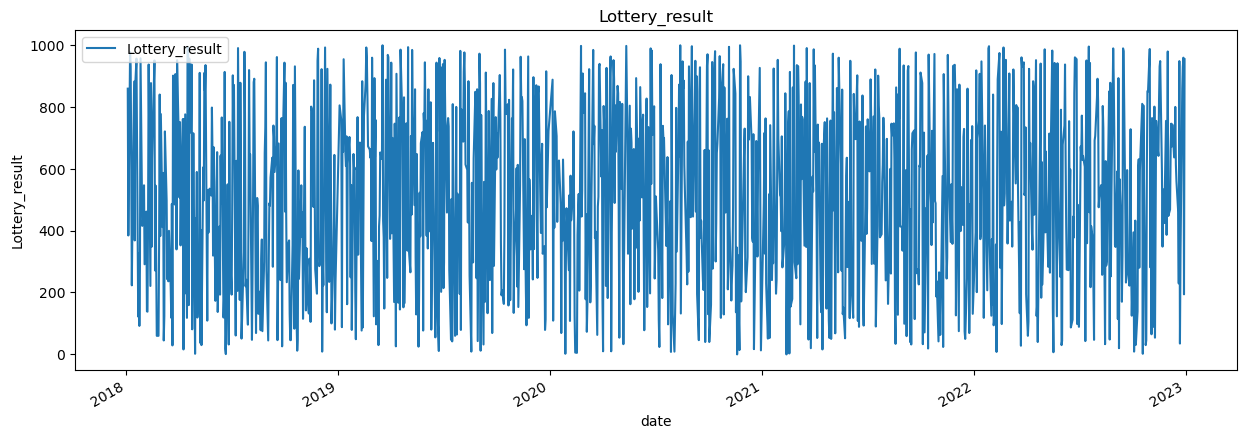

In [51]:
#042 code3-3 グラフで確認
df.plot(figsize=(15,5)) #グラフサイズ入れた
plt.title('Lottery_result')
plt.ylabel('Lottery_result')
plt.xlabel('date')
plt.show()



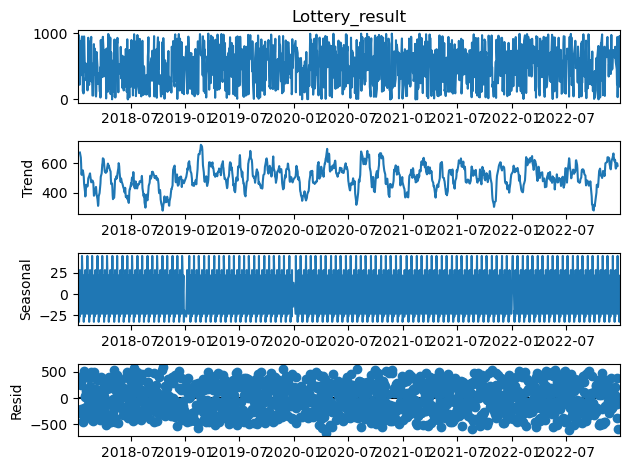

In [52]:
#042 code3-4 移動平均法を利用した分解_加法モデル
#成分分解

result=seasonal_decompose(df.Lottery_result,model='additive',period=12)

result.plot()
plt.show()

In [53]:
#043 code3-5 移動平均法を利用した分解_乗法モデル
#成分分解
"""
result=seasonal_decompose(df.Lottery_result,model='multiplicative',period=12)

result.plot()
plt.show()
"""
#乗算的な季節性は、ゼロと負の値には適切ではありません

"\nresult=seasonal_decompose(df.Lottery_result,model='multiplicative',period=12)\n\nresult.plot()\nplt.show()\n"

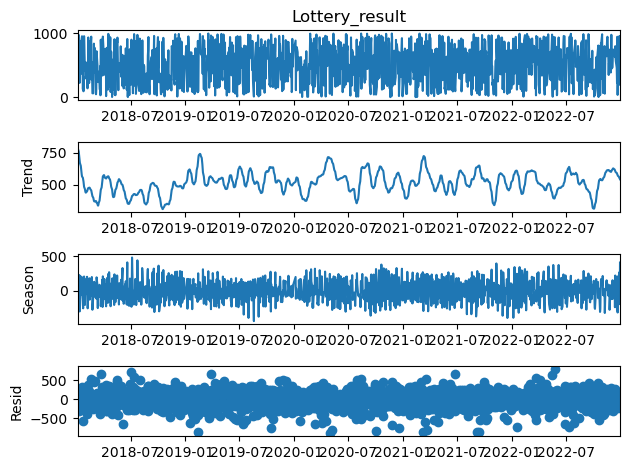

In [54]:
#044 code3-6 SLT分解_LOESS平滑化
#成分分解

#stl=STL(df.Lottery_result,period=12,robust=True).fit()
stl=STL(df.Lottery_result,period=12,robust=True).fit()
stl.plot()
plt.show()

#-----この分解法を使用しよう-----

In [55]:
#045 code3-7 現系列に対するADF検定
#ADF検定
dftest=adfuller(df.Lottery_result)

print('ADF Statistic:',dftest[0])
print('p-value:',dftest[1])
print('Critical values:')
for i,j in dftest[4].items():
    print('\t',i,j)


ADF Statistic: -36.029646929678215
p-value: 0.0
Critical values:
	 1% -3.435433297366533
	 5% -2.863784847800804
	 10% -2.5679651739400224


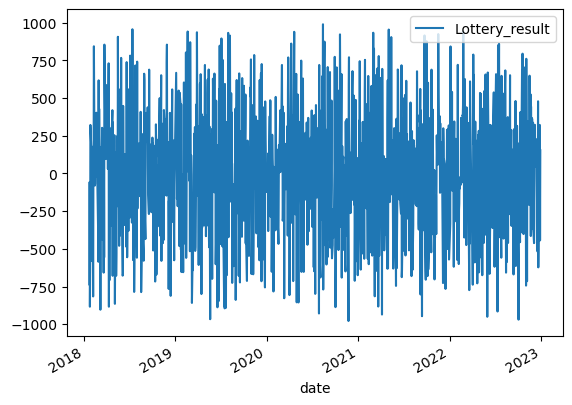

In [56]:
#046 code3-8 現系列の差分系列
df_d1=df.diff(12).dropna()
df_d1.plot()
plt.show()

In [57]:
#047 code3-9 現系列の差分系列のADF検定
#ADF検定
dftest=adfuller(df_d1.Lottery_result)

print('ADF Statistic:',dftest[0])
print('p-value:',dftest[1])
print('Critical values:')
for i,j in dftest[4].items():
    print('\t',i,j)

#定常な時系列データかもね    

ADF Statistic: -13.015074599113811
p-value: 2.5209158567494073e-24
Critical values:
	 1% -3.4355754676859886
	 5% -2.8638475772391665
	 10% -2.5679985805677017


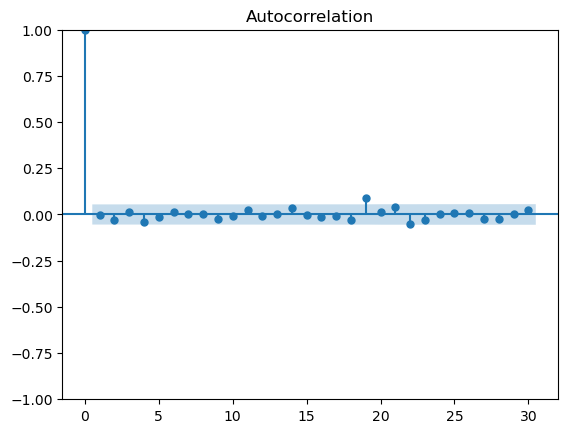

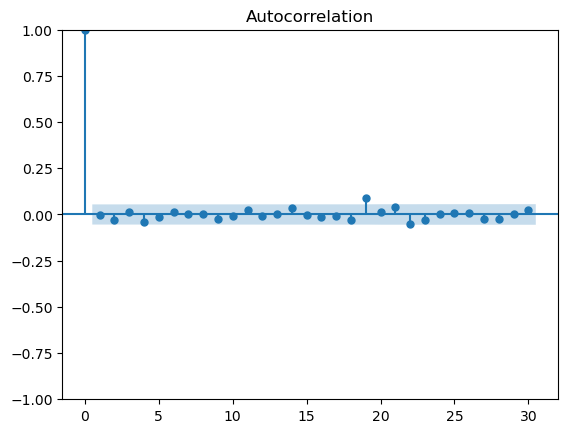

In [58]:
#048 code3-12 現系列のコレラグラム
acf=plot_acf(df.Lottery_result,lags=30)
pact=plot_acf(df.Lottery_result,lags=30)


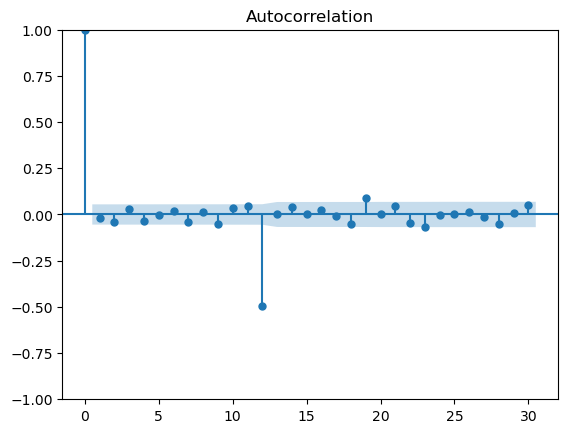

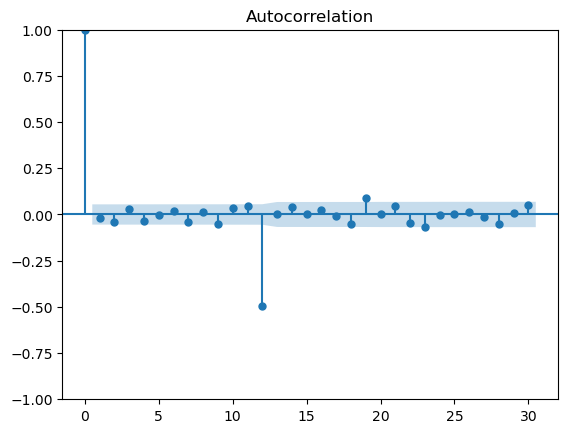

In [59]:
#049 code3-13 現系列のコレラグラム_12カ月
acf=plot_acf(df_d1.Lottery_result,lags=30)
pact=plot_acf(df_d1.Lottery_result,lags=30)

#12カ月周期ある

In [60]:
#ARIMA 予想モデル

In [61]:
#050 code3-15 ARIMA 予想モデル
import numpy as np
import pandas as pd
import datetime

from pmdarima import auto_arima
from pmdarima.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=[12,9]
plt.rcParams['font.size']=14

In [62]:
#051 code3-16 必要なデータセット
dataset='Num_3_predict/01_output/Num_3_2018_2022_data.csv'
df=pd.read_csv(dataset,index_col='date',parse_dates=True)

df

,Lottery_result
date,
2018-01-04,858
2018-01-05,384
2018-01-08,976
2018-01-09,930
2018-01-10,634
...,...
2022-12-26,857
2022-12-27,929
2022-12-28,958


In [63]:
#052 code3-17 学習データとテストデータ(12カ月)の分割
train,test=train_test_split(df,test_size=12)

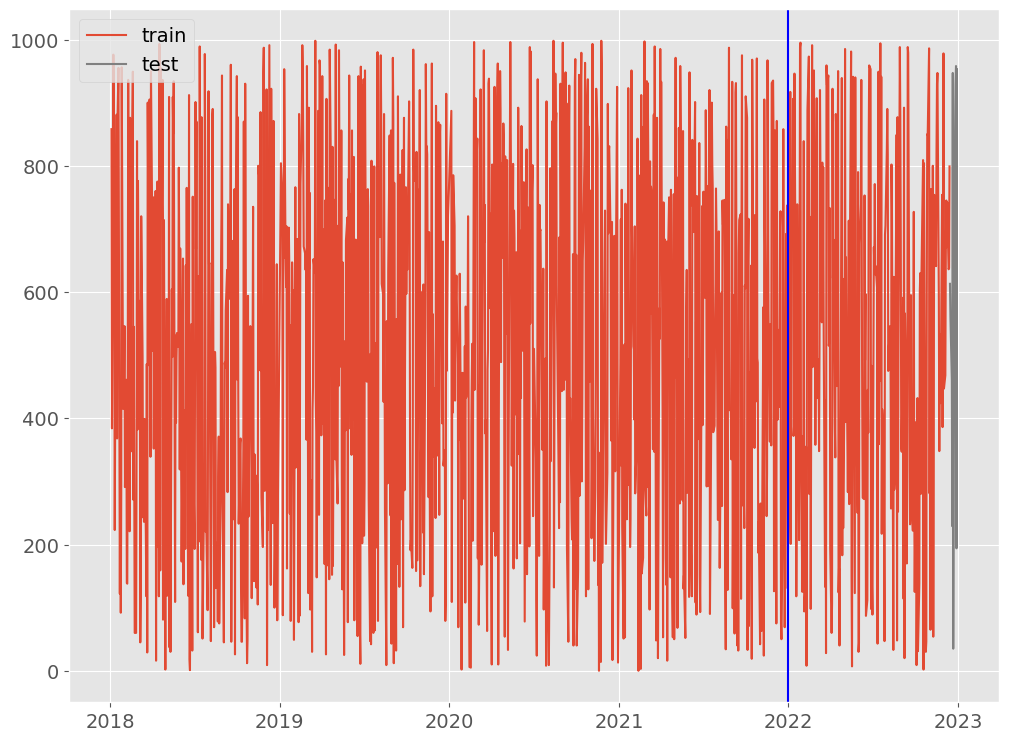

In [64]:
#053 code3-18 学習データとテストデータのグラフ
fig, ax=plt.subplots()

ax.plot(train.index,train.values,label='train')
ax.plot(test.index,test.values,label='test',color='gray')
ax.axvline(datetime.datetime(2022,1,1),color='blue')
ax.legend()
plt.show()


In [65]:
#054 code3-19 予測モデルの学習
arima_model=auto_arima(train,Lottery_result=True,m=12)
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1278
Model:                        SARIMAX   Log Likelihood               -9072.428
Date:                Thu, 20 Jul 2023   AIC                          18148.855
Time:                        18:02:47   BIC                          18159.162
Sample:                             0   HQIC                         18152.726
                               - 1278                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    508.3419      8.202     61.978      0.000     492.266     524.418
sigma2      8.582e+04   5378.567     15.955      0.000    7.53e+04    9.64e+04
Ljung-Box (L1) (Q):                   0.01   Jarque-

In [66]:
#055 code3-20 予測の実施
train_pred=arima_model.predict_in_sample()
test_pred=arima_model.predict(n_periods=12)

c:\Users\yoshikoshi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [67]:
#056 code3-21 予測精度
print('RMSE:\n',np.sqrt(mean_squared_error(test.Lottery_result, test_pred)))
print('MAE:\n',mean_absolute_error(test.Lottery_result, test_pred)) 
print('MAPE:\n',mean_absolute_percentage_error(test.Lottery_result, test_pred))

RMSE:
 334.13633570880467
MAE:
 296.0263432446531
MAPE:
 1.6278813268431438


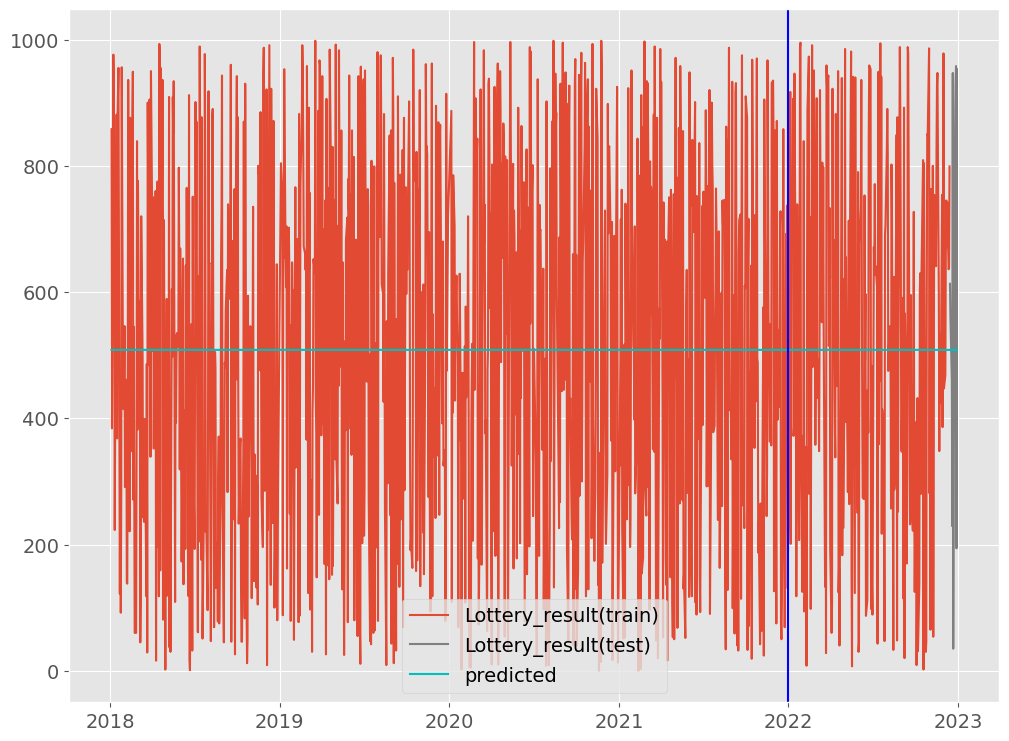

In [68]:
#057 code3-22 予測値と実測値
fig, ax=plt.subplots()
#実測データの学習とテスト
ax.plot(train.index,train.Lottery_result,label='Lottery_result(train)')
ax.plot(test.index,test.Lottery_result,label='Lottery_result(test)',color='gray')

#予測データの学習とテスト
ax.plot(train.index,train_pred,color='c')
ax.plot(test.index,test_pred,label='predicted',color='c')

ax.axvline(datetime.datetime(2022,1,1),color='blue')
ax.legend()
plt.show()

In [69]:
#ARIMA予測モデルはあわないみたい

In [70]:
#-----休憩-----

In [71]:
#058 ホールウインターズ予測モデル
import pandas as pd
import numpy as np
import datetime

from statsmodels.tsa.holtwinters import ExponentialSmoothing

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from pmdarima.model_selection import train_test_split

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=[12,9]
plt.rcParams['font.size']=14

In [72]:
#059 code3-24 データ読み込み
dataset='Num_3_predict/01_output/Num_3_2018_2022_data.csv'
df=pd.read_csv(dataset,index_col='date',parse_dates=True)
df

,Lottery_result
date,
2018-01-04,858
2018-01-05,384
2018-01-08,976
2018-01-09,930
2018-01-10,634
...,...
2022-12-26,857
2022-12-27,929
2022-12-28,958


In [73]:
#060 code3-25 データをセット　学習とテストのデータに分割（12カ月)
train,test=train_test_split(df,test_size=12)

In [74]:
#061 code3-26 予測モデルの学習
HW_model=ExponentialSmoothing(train,trend='additive',seasonal='additive',seasonal_periods=12)
HW_model_fitted=HW_model.fit()

c:\Users\yoshikoshi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\yoshikoshi\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [75]:
#062 code3-27 予測の実施
train_pred=HW_model_fitted.fittedvalues
test_pred=HW_model_fitted.forecast(12)

c:\Users\yoshikoshi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [76]:
#063 code3-3-28 予測精度
print('RMSE:\n',np.sqrt(mean_squared_error(test.Lottery_result,test_pred)))
print('MAE:\n',mean_squared_error(test.Lottery_result,test_pred))
print('MAPE:\n',mean_squared_error(test.Lottery_result,test_pred))

RMSE:
 333.4591590259089
MAE:
 111195.0107382664
MAPE:
 111195.0107382664


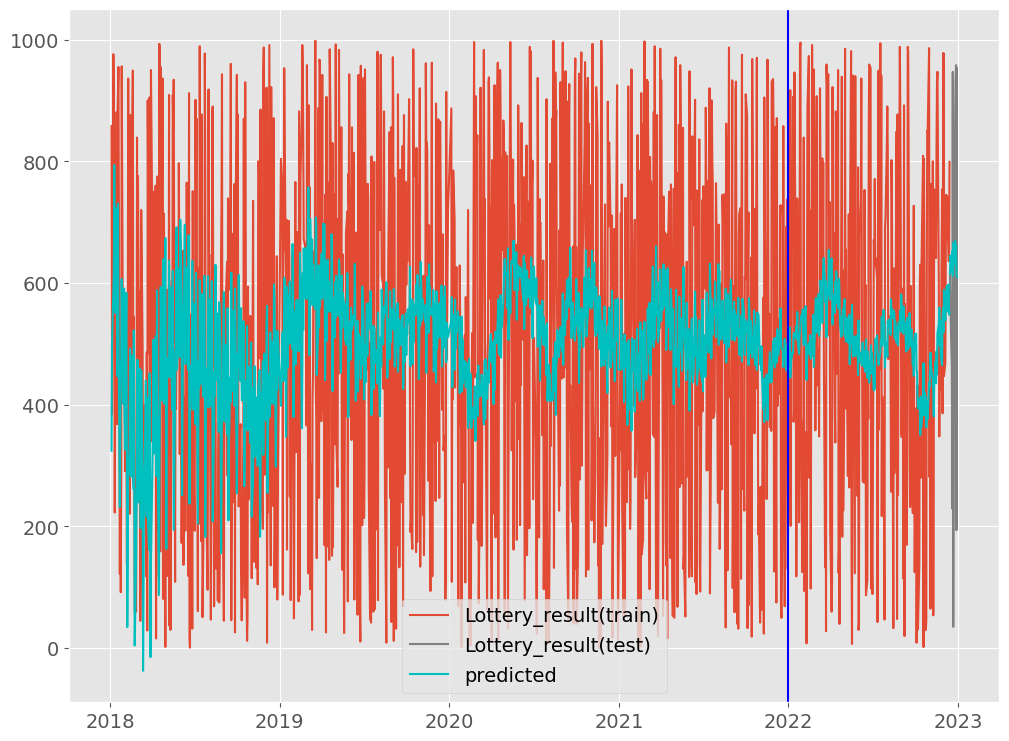

In [77]:
#064 code3-29 予測値と実測値
fig, ax=plt.subplots()
#実測データの学習とテスト
ax.plot(train.index,train.Lottery_result,label='Lottery_result(train)')
ax.plot(test.index,test.Lottery_result,label='Lottery_result(test)',color='gray')

#予測データの学習とテスト
ax.plot(train.index,train_pred,color='c')
ax.plot(test.index,test_pred,label='predicted',color='c')

ax.axvline(datetime.datetime(2022,1,1),color='blue')
ax.legend()
plt.show()


In [78]:
#少し良くなったくらい粗いね

In [79]:
#065 code3-31 Prophet予測モデル
import pandas as pd
import numpy as np
import datetime

from prophet import Prophet

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from pmdarima.model_selection import train_test_split

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=[12,9]
plt.rcParams['font.size']=14

In [80]:
#066 code3-31 データの読み込み
dataset='Num_3_predict/01_output/Num_3_2018_2022_data.csv'
df=pd.read_csv(dataset)
df.columns=['ds','y'] #カラム名の設定
df


,ds,y
0,2018-01-04,858
1,2018-01-05,384
2,2018-01-08,976
3,2018-01-09,930
4,2018-01-10,634
...,...,...
1285,2022-12-26,857
1286,2022-12-27,929
1287,2022-12-28,958
1288,2022-12-29,194


In [81]:
#067 code3-32 データをセット　学習とテストのデータに分割（12カ月)
train,test=train_test_split(df,test_size=12)

In [82]:
#下記の_conda_installで解決
""" 
Pythonのバージョンを確認する。
condaを使って、PyEphem、Plotly、Cythonをインストールする。
condaを使って、PyStanのバージョン2. 19. 1. 1をインストールする。
condaを使って、Prophetをインストールする。
Jupyter NotebookのKernelをRestartする。

python --version
conda install ephem plotly cython
conda install pystan==2.19.1.1
conda install prophet
"""


' \nPythonのバージョンを確認する。\ncondaを使って、PyEphem、Plotly、Cythonをインストールする。\ncondaを使って、PyStanのバージョン2. 19. 1. 1をインストールする。\ncondaを使って、Prophetをインストールする。\nJupyter NotebookのKernelをRestartする。\n\npython --version\nconda install ephem plotly cython\nconda install pystan==2.19.1.1\nconda install prophet\n'

In [83]:
#068 code3-33 予測モデルの学習
#from prophet import Prophet
#import pandas as pd
#from prophet import Prophet
m=Prophet()
m.fit(train)

#AttributeError: 'Prophet' object has no attribute 'stan_backend' 明日調べよう

18:03:11 - cmdstanpy - INFO - Chain [1] start processing
18:03:15 - cmdstanpy - INFO - Chain [1] done processing


In [84]:
#069 code3-34 予測(学習データ期間+テストデータ期間)
df_future=m.make_future_dataframe(periods=12,freq='M')
df_pred=m.predict(df_future)

df['predicted']=df_pred['yhat']

train_pred=df.iloc[:-12].loc[:,'predicted']
test_pred=df.iloc[-12:].loc[:,'predicted']

In [85]:
#069 code3-35 予測精度
print('RMSE:\n',np.sqrt(mean_squared_error(test.y,test_pred)))
print('MAE:\n',mean_absolute_error(test.y,test_pred))
print('MAPE:\n',mean_absolute_percentage_error(test.y,test_pred))


RMSE:
 296.2340787150781
MAE:
 271.3881163806981
MAPE:
 1.7269967409262035


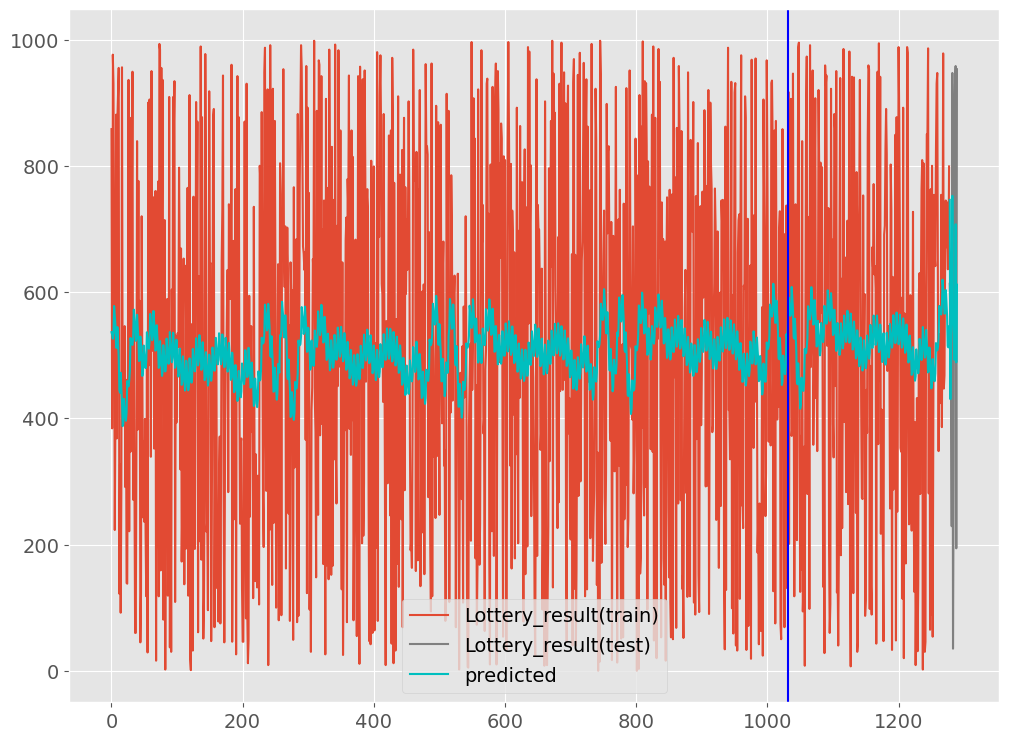

In [86]:
#070 code3-36 予測値と実測値
fig, ax=plt.subplots()
#実測データの学習とテスト
ax.plot(train.index,train.y,label='Lottery_result(train)')
ax.plot(test.index,test.y,label='Lottery_result(test)',color='gray')

#予測データの学習とテスト
ax.plot(train.index,train_pred,color='c')
ax.plot(test.index,test_pred,label='predicted',color='c')

ax.axvline(1032,color='blue')
ax.legend()
plt.show()


In [87]:
#まだ粗いね

In [88]:

#071 code3-37 Prophetで構築する予測モデル
import numpy as np
import pandas as pd
from prophet import Prophet

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import TimeSeriesSplit
from pmdarima.model_selection import train_test_split

import optuna

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=[12,9]
plt.rcParams['font.size']=14

In [89]:
#071 code3-38 時系列データの読み込み
dataset='Num_3_predict/01_output/Num_3_2018_2022_data.csv'
df=pd.read_csv(dataset)
df.columns=['ds','y']
df

,ds,y
0,2018-01-04,858
1,2018-01-05,384
2,2018-01-08,976
3,2018-01-09,930
4,2018-01-10,634
...,...,...
1285,2022-12-26,857
1286,2022-12-27,929
1287,2022-12-28,958
1288,2022-12-29,194


In [90]:
#072 code3-39 データをセット　学習とテストのデータに分割（12カ月)
train,test=train_test_split(df,test_size=12)

In [91]:
#073 code3-40 Optunaの目的関数の設定
def objective(trial):

    params={'changepoint_prior_scale' :trial.suggest_float('changepoint_prior_scale',0.001,0.5),
            'seasonality_prior_scale' :trial.suggest_float('seasonality_prior_scale',0.01,10),
            'seasonality_mode' :trial.suggest_categorical('seasonality_mode',['additive','multiplicative']),
            'changepoint_range' :trial.suggest_float('changepoint_range',0.8,0.95,step=0.001),
            'n_changepoints' :trial.suggest_int('n_changepoints',20,35),
            }
    
    tss=TimeSeriesSplit(test_size=12)
    cv_mse=[]

    for fold, (train_index,valid_index)in enumerate(tss.split(train)):
        train_data=train.iloc[train_index]
        valid_data=train.iloc[valid_index]

        m=Prophet(**params)
        m.fit(train_data)

        df_future=m.make_future_dataframe(periods=len(valid_data),freq='M')
        df_pred=m.predict(df_future)
        preds=df_pred.tail(len(valid_data))

        val_mse=mean_squared_error(valid_data.y,preds.yhat)
        cv_mse.append(val_mse)
    return np.mean(cv_mse)

optuna.logging.disable_default_handler()
study=optuna.create_study(direction="minimize")

study.optimize(objective,n_trials=1000,n_jobs=-1)

print(study.best_params)
#90min
 


18:03:32 - cmdstanpy - INFO - Chain [1] start processing
18:03:32 - cmdstanpy - INFO - Chain [1] start processing
18:03:32 - cmdstanpy - INFO - Chain [1] start processing
18:03:32 - cmdstanpy - INFO - Chain [1] start processing
18:03:33 - cmdstanpy - INFO - Chain [1] done processing
18:03:33 - cmdstanpy - INFO - Chain [1] done processing
18:03:33 - cmdstanpy - INFO - Chain [1] done processing
18:03:33 - cmdstanpy - INFO - Chain [1] done processing
18:03:40 - cmdstanpy - INFO - Chain [1] start processing
18:03:42 - cmdstanpy - INFO - Chain [1] done processing
18:03:42 - cmdstanpy - INFO - Chain [1] start processing
18:03:43 - cmdstanpy - INFO - Chain [1] start processing
18:03:43 - cmdstanpy - INFO - Chain [1] start processing
18:03:45 - cmdstanpy - INFO - Chain [1] done processing
18:03:45 - cmdstanpy - INFO - Chain [1] done processing
18:03:45 - cmdstanpy - INFO - Chain [1] done processing
18:03:52 - cmdstanpy - INFO - Chain [1] start processing
18:03:54 - cmdstanpy - INFO - Chain [1]

{'changepoint_prior_scale': 0.4882044499705937, 'seasonality_prior_scale': 0.011086923101926256, 'seasonality_mode': 'multiplicative', 'changepoint_range': 0.916, 'n_changepoints': 21}


In [92]:
#074 code3-41 予測モデルの学習
m=Prophet(**study.best_params)
m.fit(train)

19:41:33 - cmdstanpy - INFO - Chain [1] start processing
19:41:33 - cmdstanpy - INFO - Chain [1] done processing


In [93]:
#075 code3-42 予測の実施
df_future=m.make_future_dataframe(periods=12,freq='M')
df_pred=m.predict(df_future)
df['predicted']=df_pred['yhat']

train_pred=df.iloc[:-12].loc[:,'predicted']
test_pred=df.iloc[-12:].loc[:,'predicted']

In [94]:
#076 code3-43 予測精度
print('RMSE:\n',np.sqrt(mean_squared_error(test.y,test_pred)))
print('MAE:\n',mean_absolute_error(test.y,test_pred))
print('MAPE:\n',mean_absolute_percentage_error(test.y,test_pred))

RMSE:
 332.75028805471413
MAE:
 297.0254409640707
MAPE:
 1.663162691134091


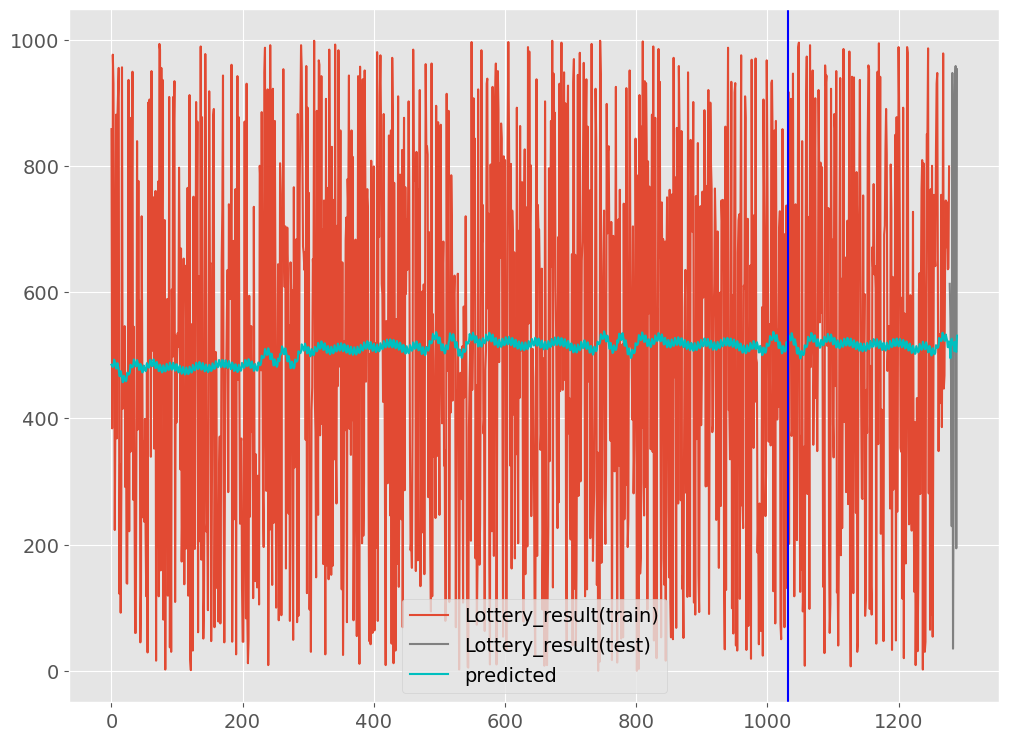

In [95]:
#077 code3-44 予測値と実測値
fig, ax=plt.subplots()
#実測データの学習とテスト
ax.plot(train.index,train.y,label='Lottery_result(train)')
ax.plot(test.index,test.y,label='Lottery_result(test)',color='gray')

#予測データの学習とテスト
ax.plot(train.index,train_pred,color='c')
ax.plot(test.index,test_pred,label='predicted',color='c')

ax.axvline(1032,color='blue')
ax.legend()
plt.show()

In [96]:
#良くなっているらしいが今は分からない

In [97]:
#時系列特徴量を生成したデータを作る

In [98]:
#078 code3-45 データの読み込み
import pandas as pd
dataset='Num_3_predict/01_output/Num_3_2018_2022_data.csv'
df=pd.read_csv(dataset,index_col='date',parse_dates=True)
df

,Lottery_result
date,
2018-01-04,858
2018-01-05,384
2018-01-08,976
2018-01-09,930
2018-01-10,634
...,...
2022-12-26,857
2022-12-27,929
2022-12-28,958


In [99]:
#079 code3-46 ラグ1_特徴量の生成
lag1=df.shift(1)
print(lag1.head(15))

            Lottery_result
date                      
2018-01-04             NaN
2018-01-05           858.0
2018-01-08           384.0
2018-01-09           976.0
2018-01-10           930.0
2018-01-11           634.0
2018-01-12           223.0
2018-01-15           413.0
2018-01-16           881.0
2018-01-17           368.0
2018-01-18           873.0
2018-01-19           916.0
2018-01-22           955.0
2018-01-23           122.0
2018-01-24           327.0


In [100]:
#080 code3-47 ラグ12_特徴量の生成
lag12=df.shift(12)
print(lag12.head(15))

            Lottery_result
date                      
2018-01-04             NaN
2018-01-05             NaN
2018-01-08             NaN
2018-01-09             NaN
2018-01-10             NaN
2018-01-11             NaN
2018-01-12             NaN
2018-01-15             NaN
2018-01-16             NaN
2018-01-17             NaN
2018-01-18             NaN
2018-01-19             NaN
2018-01-22           858.0
2018-01-23           384.0
2018-01-24           976.0


In [101]:
#081 code3-48 ローリング特徴量
window12=lag1.rolling(window=12).mean()
print(window12.head(15))

            Lottery_result
date                      
2018-01-04             NaN
2018-01-05             NaN
2018-01-08             NaN
2018-01-09             NaN
2018-01-10             NaN
2018-01-11             NaN
2018-01-12             NaN
2018-01-15             NaN
2018-01-16             NaN
2018-01-17             NaN
2018-01-18             NaN
2018-01-19             NaN
2018-01-22      700.916667
2018-01-23      639.583333
2018-01-24      634.833333


In [102]:
#082 code3-49 エクスパンディング特徴量
expanding=lag1.expanding().mean()
print(expanding.tail(15))

            Lottery_result
date                      
2022-12-12      507.912157
2022-12-13      508.012539
2022-12-14      508.114330
2022-12-15      508.341941
2022-12-16      508.423769
2022-12-19      508.463281
2022-12-20      508.425449
2022-12-21      508.207488
2022-12-22      508.549493
2022-12-23      508.180685
2022-12-26      508.041245
2022-12-27      508.312597
2022-12-28      508.639472
2022-12-29      508.988354
2022-12-30      508.743988


In [103]:
#083 code3-50 作成した時系列特徴量を結合してデータを生成
df_tbl=pd.concat([df,lag1,lag12,window12,expanding],axis=1)
df_tbl.columns=['y','log1','log12','window12','expanding']
print(df_tbl.head(15))

              y   log1  log12    window12   expanding
date                                                 
2018-01-04  858    NaN    NaN         NaN         NaN
2018-01-05  384  858.0    NaN         NaN  858.000000
2018-01-08  976  384.0    NaN         NaN  621.000000
2018-01-09  930  976.0    NaN         NaN  739.333333
2018-01-10  634  930.0    NaN         NaN  787.000000
2018-01-11  223  634.0    NaN         NaN  756.400000
2018-01-12  413  223.0    NaN         NaN  667.500000
2018-01-15  881  413.0    NaN         NaN  631.142857
2018-01-16  368  881.0    NaN         NaN  662.375000
2018-01-17  873  368.0    NaN         NaN  629.666667
2018-01-18  916  873.0    NaN         NaN  654.000000
2018-01-19  955  916.0    NaN         NaN  677.818182
2018-01-22  122  955.0  858.0  700.916667  700.916667
2018-01-23  327  122.0  384.0  639.583333  656.384615
2018-01-24   92  327.0  976.0  634.833333  632.857143


In [104]:
#084 code3-51 欠損値削除
df_tbl=df_tbl.dropna()
print(df_tbl.head(15))

              y   log1  log12    window12   expanding
date                                                 
2018-01-22  122  955.0  858.0  700.916667  700.916667
2018-01-23  327  122.0  384.0  639.583333  656.384615
2018-01-24   92  327.0  976.0  634.833333  632.857143
2018-01-25  282   92.0  930.0  561.166667  596.800000
2018-01-26  956  282.0  634.0  507.166667  577.125000
2018-01-29  415  956.0  223.0  534.000000  599.411765
2018-01-30  432  415.0  413.0  550.000000  589.166667
2018-01-31  437  432.0  881.0  551.583333  580.894737
2018-02-01  546  437.0  368.0  514.583333  573.700000
2018-02-02  291  546.0  873.0  529.416667  572.380952
2018-02-05  461  291.0  916.0  480.916667  559.590909
2018-02-06  139  461.0  955.0  443.000000  555.304348
2018-02-07  138  139.0  122.0  375.000000  537.958333
2018-02-08  448  138.0  327.0  376.333333  521.960000
2018-02-09  936  448.0   92.0  386.416667  519.115385


In [105]:
#085 code3-52 トレンド特徴量
df_tbl['t']=pd.RangeIndex(start=0,stop=len(df_tbl))
print(df_tbl)

              y   log1  log12    window12   expanding     t
date                                                       
2018-01-22  122  955.0  858.0  700.916667  700.916667     0
2018-01-23  327  122.0  384.0  639.583333  656.384615     1
2018-01-24   92  327.0  976.0  634.833333  632.857143     2
2018-01-25  282   92.0  930.0  561.166667  596.800000     3
2018-01-26  956  282.0  634.0  507.166667  577.125000     4
...         ...    ...    ...         ...         ...   ...
2022-12-26  857  329.0  671.0  554.833333  508.041245  1273
2022-12-27  929  857.0  742.0  570.333333  508.312597  1274
2022-12-28  958  929.0  636.0  585.916667  508.639472  1275
2022-12-29  194  958.0  638.0  612.750000  508.988354  1276
2022-12-30  953  194.0  799.0  575.750000  508.743988  1277

[1278 rows x 6 columns]


In [106]:
#086 code3-53 csvファイルへ出力
df_tbl.to_csv('Num_3_predict/01_output/df_tbl.csv')

In [107]:
#必要なデータ生成したところで----休憩-----

In [108]:
#087 code3-54　線形回帰で予測モデルを構築
import numpy as np
import pandas as pd
import datetime

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from pmdarima.model_selection import train_test_split

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=[12,9]
plt.rcParams['font.size']=14


In [109]:
#088 code3-55 データ読み込み
dataset='Num_3_predict/01_output/df_tbl.csv'
df=pd.read_csv(dataset,index_col='date',parse_dates=True)
df

,y,log1,log12,window12,expanding,t
date,,,,,,
2018-01-22,122,955.0,858.0,700.916667,700.916667,0
2018-01-23,327,122.0,384.0,639.583333,656.384615,1
2018-01-24,92,327.0,976.0,634.833333,632.857143,2
2018-01-25,282,92.0,930.0,561.166667,596.800000,3
2018-01-26,956,282.0,634.0,507.166667,577.125000,4
...,...,...,...,...,...,...
2022-12-26,857,329.0,671.0,554.833333,508.041245,1273
2022-12-27,929,857.0,742.0,570.333333,508.312597,1274
2022-12-28,958,929.0,636.0,585.916667,508.639472,1275


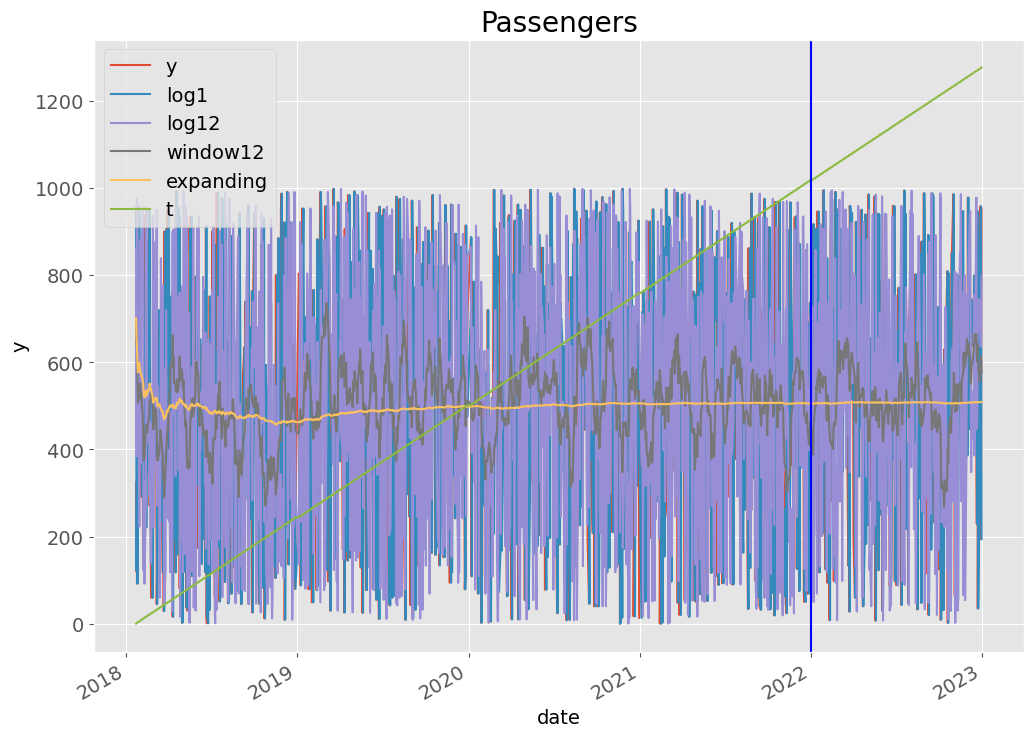

In [110]:
#089 code3-56 プロット
df.plot()
plt.title('Passengers')
plt.ylabel('y')
plt.xlabel('date')
plt.axvline(datetime.datetime(2022,1,1),color='blue')
plt.show()

In [111]:
#090 code3-57 学習データとテストデータを12カ月に分割
train,test=train_test_split(df,test_size=12)
y_train=train['y']
x_train=train.drop('y',axis=1)
y_test=test['y']
x_test=test.drop('y',axis=1)

In [112]:
#091 code3-58 説明変数x
x_test

,log1,log12,window12,expanding,t
date,,,,,
2022-12-15,799.0,386.0,646.416667,508.341941,1266
2022-12-16,613.0,589.0,665.333333,508.423769,1267
2022-12-19,559.0,978.0,662.833333,508.463281,1268
2022-12-20,460.0,447.0,619.666667,508.425449,1269
2022-12-21,229.0,468.0,601.500000,508.207488,1270
2022-12-22,947.0,658.0,641.416667,508.549493,1271
2022-12-23,35.0,745.0,589.500000,508.180685,1272
2022-12-26,329.0,671.0,554.833333,508.041245,1273
2022-12-27,857.0,742.0,570.333333,508.312597,1274


In [113]:
#092 code3-59 予測モデルの学習
regressor=LinearRegression()
regressor.fit(x_train,y_train)
print('切片：',regressor.intercept_)
print('回帰係数：',regressor.coef_)

切片： 1020.4030680931996
回帰係数： [ 1.31681730e-03 -6.91786126e-04 -1.05169741e-01 -9.99687999e-01
  5.91865971e-02]


In [114]:
#093 code3-60 予測の実施
train_pred=regressor.predict(x_train)

In [115]:
#094 code3-61 予測の実施
y_train_new=y_train.copy()

for i in range(len(y_test)):
    x_value=x_test.iloc[i:(i+1),:]
    y_value_pred=regressor.predict(x_value)
    y_value_pred=pd.Series(y_value_pred,index=[x_value.index[0]])
    y_train_new=pd.concat([y_train_new,y_value_pred])

    lag1_new=y_train_new[-1]
    lag12_new=y_train_new[-12]
    window12_new=y_train_new[-12:].mean()
    expanding_new=y_train_new.mean()

    x_test.iloc[(i+1):(i+2),0]=lag1_new
    x_test.iloc[(i+1):(i+2),1]=lag12_new
    x_test.iloc[(i+1):(i+2),2]=window12_new
    x_test.iloc[(i+1):(i+2),3]=expanding_new

    test_pred=y_train_new[-12:]

print(x_test)

                  log1  log12    window12   expanding     t
date                                                       
2022-12-15  799.000000  386.0  646.416667  508.341941  1266
2022-12-16  519.951597  589.0  657.579300  506.527191  1267
2022-12-19  520.143107  978.0  651.841225  506.537930  1268
2022-12-20  520.526178  447.0  613.718407  506.548953  1269
2022-12-21  524.951555  468.0  620.214370  506.563443  1270
2022-12-22  524.304377  658.0  624.906401  506.577401  1271
2022-12-23  523.723858  745.0  613.716723  506.590881  1272
2022-12-26  524.885435  671.0  595.373842  506.605252  1273
2022-12-27  526.912092  742.0  583.366517  506.621192  1274
2022-12-28  528.171704  636.0  565.547492  506.638094  1275
2022-12-29  530.163003  638.0  556.727742  506.656530  1276
2022-12-30  531.132569  799.0  547.822123  506.675697  1277


In [116]:
#095 code3-62 予測モデルのテスト
print('RMSE:\n',np.sqrt(mean_squared_error(y_test,test_pred)))
print('MAE:\n',mean_absolute_error(y_test,test_pred))
print('MAPE:\n',mean_absolute_percentage_error(y_test,test_pred))

RMSE:
 329.251459554424
MAE:
 292.7145515600044
MAPE:
 1.6744431422254935


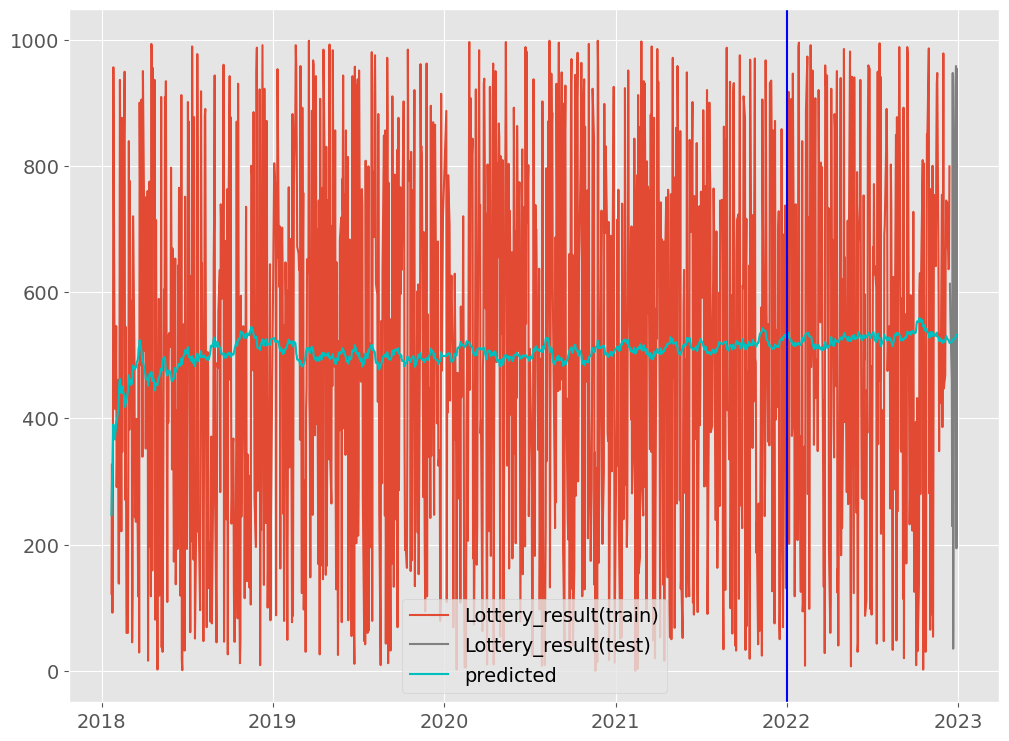

In [117]:
#096 code3-63 予測値と実測値
fig, ax=plt.subplots()
#実測データの学習とテスト
ax.plot(train.index,y_train,label='Lottery_result(train)')
ax.plot(test.index,y_test,label='Lottery_result(test)',color='gray')

#予測データの学習とテスト
ax.plot(train.index,train_pred,color='c')
ax.plot(test.index,test_pred,label='predicted',color='c')

ax.axvline(datetime.datetime(2022,1,1),color='blue')
ax.legend()
plt.show()

In [118]:
#線形回帰では予測が粗いのかな----休憩-----

In [119]:
#097 code3-64 線形回帰で予測モデル構築　REF法で変数選択
import numpy as np
import pandas as pd
import datetime

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from pmdarima.model_selection import train_test_split

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=[12,9]
plt.rcParams['font.size']=14


In [120]:
#098 code3-65 データの読み込み
dataset='Num_3_predict/01_output/df_tbl.csv'
df=pd.read_csv(dataset,index_col='date',parse_dates=True)
df

,y,log1,log12,window12,expanding,t
date,,,,,,
2018-01-22,122,955.0,858.0,700.916667,700.916667,0
2018-01-23,327,122.0,384.0,639.583333,656.384615,1
2018-01-24,92,327.0,976.0,634.833333,632.857143,2
2018-01-25,282,92.0,930.0,561.166667,596.800000,3
2018-01-26,956,282.0,634.0,507.166667,577.125000,4
...,...,...,...,...,...,...
2022-12-26,857,329.0,671.0,554.833333,508.041245,1273
2022-12-27,929,857.0,742.0,570.333333,508.312597,1274
2022-12-28,958,929.0,636.0,585.916667,508.639472,1275


In [121]:
#099 code3-66 学習データとテストデータを12カ月に分割
train,test=train_test_split(df,test_size=12)
y_train=train['y']
x_train=train.drop('y',axis=1)
y_test=test['y']
x_test=test.drop('y',axis=1)

In [122]:
#100 code3-67 変数選択
rfecv=RFECV(estimator=LinearRegression(),n_jobs=-1,scoring='neg_mean_squared_error',cv=10)
rfecv.fit(x_train,y_train)

columns_selected=x_train.columns[rfecv.support_]
print('選択変数',columns_selected.values)

選択変数 ['window12' 'expanding' 't']


In [123]:
#101 code3-68 説明変数xの生成
x_train_selected=pd.DataFrame(rfecv.transform(x_train),columns=columns_selected,index=x_train.index)
x_test_selected=pd.DataFrame(rfecv.transform(x_test),columns=columns_selected,index=x_test.index)

In [124]:
#102 code3-69 予測モデルの学習
regressor=LinearRegression()
regressor.fit(x_train_selected,y_train)

print('切片：',regressor.intercept_)
print('回帰係数：',regressor.coef_)

切片： 1020.7282122490699
回帰係数： [-0.10451292 -1.000404    0.05921084]


In [125]:
#103 code3-70 予測の実施
train_pred=regressor.predict(x_train_selected)

In [126]:
#104 code3-71 予測の実施
y_train_new=y_train.copy()
for i in range(len(y_test)):
    x_value=x_test_selected.iloc[i:(i+1),:]
    y_value_pred=regressor.predict(x_value)
    y_value_pred=pd.Series(y_value_pred,index=[x_value.index[0]])
    y_train_new=pd.concat([y_train_new,y_value_pred])

    lag12_new=y_train_new[-12]
    expanding_new=y_train_new.mean()

    x_test_selected.iloc[(i+1):(i+2),0]=lag12_new
    x_test_selected.iloc[(i+1):(i+2),1]=expanding_new

test_pred=y_train_new[-12:]    

In [127]:
#105 code3-72 予測モデルのテスト
print('RMSE:\n',np.sqrt(mean_squared_error(y_test,test_pred)))
print('MAE:\n',mean_absolute_error(y_test,test_pred))
print('MAPE:\n',mean_absolute_percentage_error(y_test,test_pred))

RMSE:
 332.714648215303
MAE:
 292.13739833825593
MAPE:
 1.6625200058769123


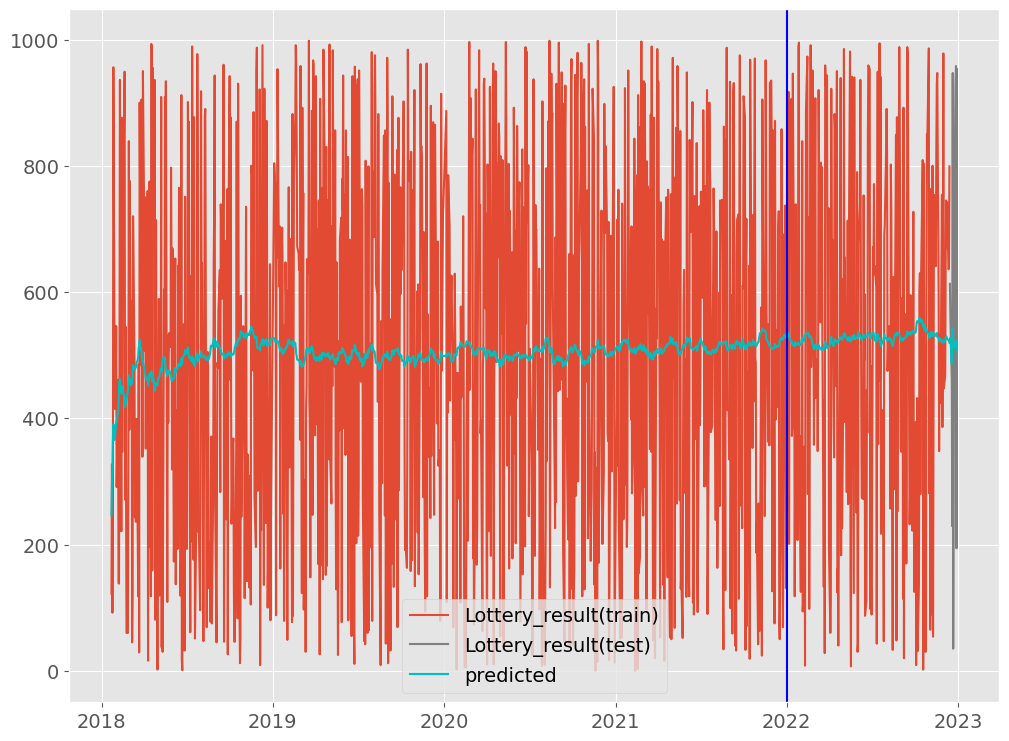

In [128]:
#106 code3-73 予測値と実測値
fig, ax=plt.subplots()
#実測データの学習とテスト
ax.plot(train.index,y_train,label='Lottery_result(train)')
ax.plot(test.index,y_test,label='Lottery_result(test)',color='gray')

#予測データの学習とテスト
ax.plot(train.index,train_pred,color='c')
ax.plot(test.index,test_pred,label='predicted',color='c')

ax.axvline(datetime.datetime(2022,1,1),color='blue')
ax.legend()
plt.show()

In [129]:
#線形回帰で予測モデル構築　REF法で変数選択 はこんな感じ

In [132]:
# rpy2 の環境設定が必要なので
"""
Anaconda Powershell Prompt で3つを順番にインストール
conda install -c r r
conda install -c r r-essentials
conda install -c r r-irkernel

R_環境設定
https://cran.r-project.org/

無理そうなのでjyupiterで学習する

vscode で使えるように2つを順番にインストール 
sudo apt install r-base -y
pip install rpy2

"""

'\nAnaconda Powershell Prompt で3つを順番にインストール\nconda install -c r r\nconda install -c r r-essentials\nconda install -c r r-irkernel\n\nR_環境設定\nhttps://cran.r-project.org/\n\n無理そうなのでjyupiterで学習する\n\n'

In [65]:
#無効な構文
"""
title:
description:
show-code:
params:
"""

SyntaxError: invalid syntax (3739990612.py, line 1)

In [123]:
#インストールできているか確認　結果として # [1] 10 が表示されれば動いています
import rpy2.robjects as ro
result = ro.r("10")
print(result)

[1] 10



In [1]:
#107 code3-74 MSTLで複数の季節成分に対応した予測モデル
import numpy as np
import pandas as pd
import statsmodels.api as sm

#Rを使うため
import rpy2
%load_ext rpy2.ipython

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=[12,9]
plt.rcParams['font.size']=14


#-----jupyterlabで動作するので操作再開してみる-----

In [2]:
#108 code3-75 データの読み込み
#dataset=sm.datasets.get_rdataset('taylor','forecast')
#display(dataset.data)
dataset='Num_3_predict/01_output/Num_3_2018_2022_data.csv'
#df=pd.read_csv(dataset,index_col='date',parse_dates=True)
df=pd.read_csv(dataset)
df


,date,Lottery_result
0,2018-01-04,858
1,2018-01-05,384
2,2018-01-08,976
3,2018-01-09,930
4,2018-01-10,634
...,...,...
1285,2022-12-26,857
1286,2022-12-27,929
1287,2022-12-28,958
1288,2022-12-29,194


In [3]:
#109 列名の変更
df_new=df.rename(columns={'Lottery_result':'x'})
df_new

,date,x
0,2018-01-04,858
1,2018-01-05,384
2,2018-01-08,976
3,2018-01-09,930
4,2018-01-10,634
...,...,...
1285,2022-12-26,857
1286,2022-12-27,929
1287,2022-12-28,958
1288,2022-12-29,194


In [4]:
#110 不要な列を削除
df_new=df_new.drop('date',axis=1)
df_new

,x
0,858
1,384
2,976
3,930
4,634
...,...
1285,857
1286,929
1287,958
1288,194


In [5]:
#111 csvに保管
df_new.to_csv('Num_3_predict/01_output/Num_3_2018_2022_data_1.csv')
print(df_new)

        x
0     858
1     384
2     976
3     930
4     634
...   ...
1285  857
1286  929
1287  958
1288  194
1289  953

[1290 rows x 1 columns]


In [30]:
# ここはいらないみたい
#df_new=sm.datasets.get_rdataset("taylor","forecast")
#print(df_new.data)

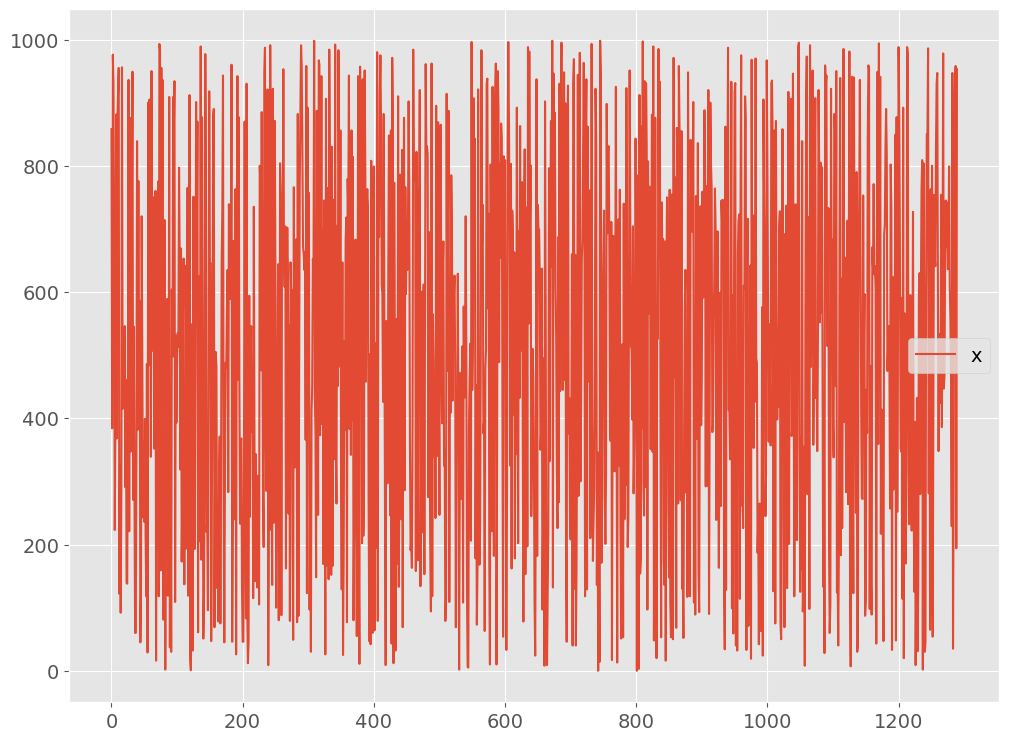

In [6]:
#109 code3-76 グラフ化
df_new.plot()
plt.show()

In [7]:
#108 code3-77 MSTLで複数の季節性を分解　R環境へオブジェクトを渡す

y=df_new.x  #データをｙへ代入
%R -i y  #pythonのデータをRへ渡す
#%R -o y #Rのデータをpythonへ渡す
print(y) #足してみた

0       858
1       384
2       976
3       930
4       634
       ... 
1285    857
1286    929
1287    958
1288    194
1289    953
Name: x, Length: 1290, dtype: int64


In [8]:
%%R #セルをR環境

#%R#その行だけR環境

library(forecast)
#library(forecast)
y = msts(y, seasonal.periods=c(257,5)) #257回/年、5年,20回/月,12か月
y_mstl = mstl(y)
autoplot(y_mstl)

#109 code3-78 

"""
XX がモジュール名なら、そのモジュールがインポートされていない
XX が変数名や関数名なら、定義されてない
XX のつづり間違い
"""


RParsingError: Parsing status not OK - PARSING_STATUS.PARSE_ERROR

In [97]:
#Jupyter上でインストールしたい場合
"""
from rpy2.robjects.packages import importr
utils = importr('utils') 
utils.install_packages('forecast')
"""

"\nfrom rpy2.robjects.packages import importr\nutils = importr('utils') \nutils.install_packages('forecast')\n"

In [96]:
%%R #テスト
library('forecast')

NULL


In [ ]:
#他のデータ_1桁だけなら解析できるかテストしてみる

In [2]:
#108 code3-75 データの読み込み
#dataset=sm.datasets.get_rdataset('taylor','forecast')
#display(dataset.data)
dataset='Num_3_predict/01_output/Num_3_2018_2022.csv'
#df=pd.read_csv(dataset,index_col='date',parse_dates=True)
df=pd.read_csv(dataset)
df

,date,Lottery_result,hundreds_place,tens_place,ones_place,kaibetu,day_of_week,day_name,trend,Sunday,...,num_0,num_1,num_2,num_3,num_4,num_5,num_6,num_7,num_8,num_9
0,2018-01-04,858,8,5,8,4827,3,Thursday,1,0,...,0,0,0,0,0,1,0,0,2,0
1,2018-01-05,384,3,8,4,4828,4,Friday,2,0,...,0,0,0,1,1,0,0,0,1,0
2,2018-01-08,976,9,7,6,4829,0,Monday,3,0,...,0,0,0,0,0,0,1,1,0,1
3,2018-01-09,930,9,3,0,4830,1,Tuesday,4,0,...,1,0,0,1,0,0,0,0,0,1
4,2018-01-10,634,6,3,4,4831,2,Wednesday,5,0,...,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,2022-12-26,857,8,5,7,6112,0,Monday,1286,0,...,0,0,0,0,0,1,0,1,1,0
1286,2022-12-27,929,9,2,9,6113,1,Tuesday,1287,0,...,0,0,1,0,0,0,0,0,0,2
1287,2022-12-28,958,9,5,8,6114,2,Wednesday,1288,0,...,0,0,0,0,0,1,0,0,1,1
1288,2022-12-29,194,1,9,4,6115,3,Thursday,1289,0,...,0,1,0,0,1,0,0,0,0,1


In [3]:
#110 不要な列を削除
df_new=df.drop(['date','Lottery_result','tens_place','ones_place','kaibetu','day_of_week','day_name','trend',
                    'Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday',
                   'h_0','h_1','h_2','h_3','h_4','h_4','h_5','h_6','h_7','h_8','h_9',
                    't_0','t_1','t_2','t_3','t_4','t_5','t_6','t_7','t_8','t_9',
                    'o_0','o_1','o_2','o_3','o_4','o_5','o_6','o_7','o_8','o_9',
                    'num_0','num_1','num_2','num_3','num_4','num_5','num_6','num_7','num_8','num_9'],axis=1)
df_new

,hundreds_place
0,8
1,3
2,9
3,9
4,6
...,...
1285,8
1286,9
1287,9
1288,1


In [4]:
#109 列名の変更
df_new=df_new.rename(columns={'hundreds_place':'x'})
df_new

,x
0,8
1,3
2,9
3,9
4,6
...,...
1285,8
1286,9
1287,9
1288,1


In [5]:
#111 csvに保管
df_new.to_csv('Num_3_predict/01_output/Num_3_2018_2022_data_2.csv')
print(df_new)

      x
0     8
1     3
2     9
3     9
4     6
...  ..
1285  8
1286  9
1287  9
1288  1
1289  9

[1290 rows x 1 columns]


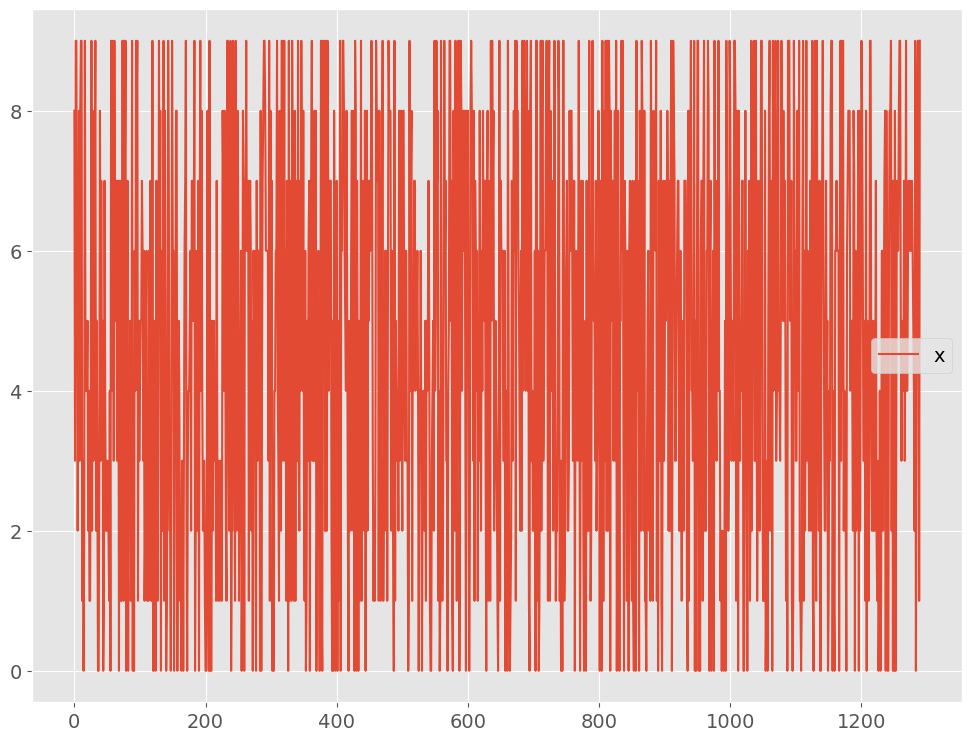

In [6]:
#109 code3-76 グラフ化
df_new.plot()
plt.show()

In [7]:
#108 code3-77 MSTLで複数の季節性を分解　R環境へオブジェクトを渡す

y=df_new.x  #データをｙへ代入
%R -i y  #pythonのデータをRへ渡す
#%R -o y #Rのデータをpythonへ渡す
print(y) #足してみた

0       8
1       3
2       9
3       9
4       6
       ..
1285    8
1286    9
1287    9
1288    1
1289    9
Name: x, Length: 1290, dtype: int64


In [8]:
%%R #セルをR環境

#%R#その行だけR環境

library(forecast)
#library(forecast)
y = msts(y, seasonal.periods=c(20,60)) #257回/年、5年,20回/月,12か月
y_mstl = mstl(y)
autoplot(y_mstl)

#109 code3-78 

"""
XX がモジュール名なら、そのモジュールがインポートされていない
XX が変数名や関数名なら、定義されてない
XX のつづり間違い
"""


RParsingError: Parsing status not OK - PARSING_STATUS.PARSE_ERROR

In [ ]:
##だめみたい_題目に季節性が複数あるデータの解析に適しているのか

In [9]:
%R -o y_mstl

KeyError: "'y_mstl' not found"